***Zomato Restaurant clustering and sentiment analysis***

# Project Summary

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, I extracted the most recurrent words utilized in the reviews and visualized them through the creation of word clouds.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **Problem Statement**

The problem statement for this project is to analyze and understand the restaurant industry in India by utilizing data from the Indian restaurant aggregator and food delivery start-up, Zomato. The project aims to gain insights into the sentiments of customer reviews, cluster Zomato restaurants into different segments, and analyze the data to make useful conclusions in the form of visualizations. The data analyzed includes information on cuisine, costing, and customer reviews. The project aims to assist customers in finding the best restaurant in their locality and aid the company in identifying areas for growth and improvement in the industry. Additionally, the project aims to use the data for sentiment analysis and identifying critics in the industry through the metadata of reviewers.

### ***1.Know Your Data***

In [2]:
# %pip install wordcloud
# %pip install xgboost
# %pip install contractions
# %pip install gensim
# %pip install tabulate

In [3]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
from wordcloud import WordCloud


from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF

from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA

#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to C:\Users\Siddharth
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Siddharth
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Siddharth
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Siddharth
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Siddharth Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
#importing contraction

import gensim
from gensim import corpora

### Dataset Loading

In [7]:
#load dataset
hotel_df=pd.read_csv("Zomato Restaurant names and Metadata.csv")
review_df=pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [8]:
#dataset first look restaurant
hotel_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [9]:
#dataset first look reviews
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [10]:
#Dataset rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [11]:
#Dataset Info
print('Restaurant Info')
print("\n")
hotel_df.info()
print('='*120)
print("\n")
print("Review Info")
print("\n")
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

Expect collections feature in Restaurant Dataset we have very less null values of all other features

In [12]:
# Dataset Duplicate Value Count
print('For Restaurant')
print("\n")
print(f"Data is Duplicated ? {hotel_df.duplicated().value_counts},unique values with {len(hotel_df[hotel_df.duplicated()])} duplication")
print("\n")
print('='*120)
print("\n")
print("for Review")
print("\n")
print(f"Data is Duplicated ? {review_df.duplicated().value_counts},unique values with {len(review_df[review_df.duplicated()])} duplication")

For Restaurant


Data is Duplicated ? <bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
100    False
101    False
102    False
103    False
104    False
Length: 105, dtype: bool>,unique values with 0 duplication




for Review


Data is Duplicated ? <bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>,unique values with 36 duplication


In [13]:
#getting duplicate values
print(f'Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

Duplicate data count = 36


Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [14]:
#checking values for American Wild Wings
review_df[(review_df['Restaurant']=='American Wild Wings')].shape

(100, 7)

In [15]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant']=='Arena Eleven')].shape

(100, 7)

### Missing Values/Null Values

In [16]:
#Missing values/Null Value Count for hotel Data
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [17]:
#Missing values/Null Value Count for review Data
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

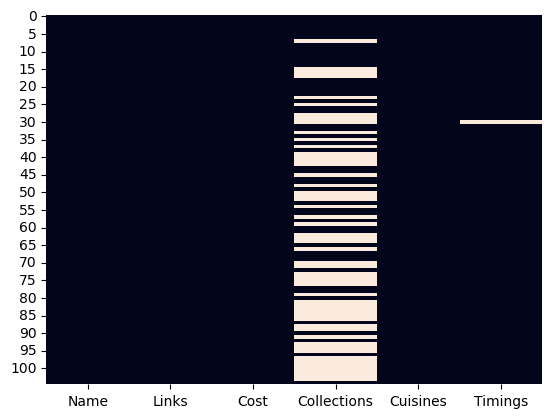

In [18]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(hotel_df.isnull(), cbar=False);

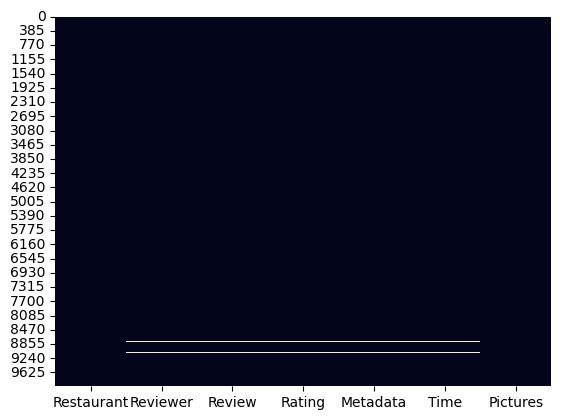

In [19]:
# Visualizing the missing values for Review
# Checking Null Value by plotting Heatmap
sns.heatmap(review_df.isnull(), cbar=False);

### What do you know about Dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.

### ***2. Understanding Your Variables***

In [20]:
#Dataset Column Restaurant
print(f'Features of Restaurant Dataset = {hotel_df.columns.to_list()}')
#Dataset Column Review
print(f'Features of Review Dataset = {review_df.columns.to_list()}')

Features of Restaurant Dataset = ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features of Review Dataset = ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [21]:
# Dataset Describe restaurant
hotel_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [22]:
# Dataset Describe review
review_df.describe(include='all').T

count unique              top  freq    mean       std  min  25%  \
Restaurant    10000    100  Beyond Flavours   100     NaN       NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13     NaN       NaN  NaN  NaN   
Review         9955   9364             good   237     NaN       NaN  NaN  NaN   
Rating         9962     10                5  3832     NaN       NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919     NaN       NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3     NaN       NaN  NaN  NaN   
Pictures    10000.0    NaN              NaN   NaN  0.7486  2.570381  0.0  0.0   

            50%  75%   max  
Restaurant  NaN  NaN   NaN  
Reviewer    NaN  NaN   NaN  
Review      NaN  NaN   NaN  
Rating      NaN  NaN   NaN  
Metadata    NaN  NaN   NaN  
Time        NaN  NaN   NaN  
Pictures    0.0  0.0  64.0

### Variables Description

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review


### Unique value for each variables

In [23]:
#Check unique value for each variable for restaurant
for i in hotel_df.columns.to_list():
    print("No. of Unique values in",i,"is",hotel_df[i].nunique(),".")

No. of Unique values in Name is 105 .
No. of Unique values in Links is 105 .
No. of Unique values in Cost is 29 .
No. of Unique values in Collections is 42 .
No. of Unique values in Cuisines is 92 .
No. of Unique values in Timings is 77 .


In [24]:
#Check unique value for each variable for review
for i in review_df.columns.to_list():
    print("No. of Unique values in",i,"is",review_df[i].nunique(),".")

No. of Unique values in Restaurant is 100 .
No. of Unique values in Reviewer is 7446 .
No. of Unique values in Review is 9364 .
No. of Unique values in Rating is 10 .
No. of Unique values in Metadata is 2477 .
No. of Unique values in Time is 9782 .
No. of Unique values in Pictures is 36 .


### ***3. Data Wrangling***

In [25]:
#creating copy of both dataset so that original data is not ruined
hotelCopy=hotel_df.copy()
reviewCopy=review_df.copy()

In [26]:
#checking for cost values before changing its datatype
hotelCopy['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [27]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotelCopy['Cost'] = hotelCopy['Cost'].str.replace(",","").astype('int64')

In [28]:
#Top 5 most costly restaurant
hotelCopy.sort_values("Cost",ascending=False)[['Name','Cost']][:5]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [29]:
#Top 5 affordable Restaurant
hotelCopy.sort_values("Cost",ascending=False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [30]:
#Hotels that share same price
hotel_dict={}
amount=hotelCopy.Cost.values.tolist()

#adding hotel name based on price by converting it into list
for price in amount:
    #get all the rows that have the current price
    rows=hotelCopy[hotelCopy['Cost']==price]
    hotel_dict[price]=rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(columns={'index':'Cost',0:'Name of Restaurants'})

#getting hotel count
hotel_count=hotelCopy.groupby('Cost')['Name'].count().reset_index().sort_values('Cost',ascending=False)

#merging together
same_price_hotel_df=same_price_hotel_df.merge(hotel_count,how='inner',on='Cost').rename(columns={'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant',ascending=False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [31]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [32]:
# spliting the cusines and storing in list 
cuisine_value_list = hotelCopy.Cuisines.str.split(', ')
cuisine_value_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [33]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

# cuisine_dict

In [34]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

# cuisine_df[:5]

In [35]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [36]:
# spliting the cusines and storing in list 
Collections_value_list = hotelCopy.Collections.dropna().str.split(', ')
# Collections_value_list

In [37]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [38]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number of Restaurants'})

#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

In [39]:
#in order to change data type for rating checking values
reviewCopy.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [40]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
reviewCopy.loc[reviewCopy['Rating'] == 'Like'] = 0
#changing data type for rating in reviewCopy data
reviewCopy['Rating'] = reviewCopy['Rating'].astype('float')

In [41]:
#since there is one rating as like converting it to median
reviewCopy.loc[reviewCopy['Rating'] == 0] = reviewCopy.Rating.median()

In [42]:
reviewCopy

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [43]:
reviewCopy['Reviewer_Total_Review']=reviewCopy['Metadata'].str.split(',',expand=True)[0]
reviewCopy['Reviewer_Followers']=reviewCopy['Metadata'].str.split(',', expand=True)[1]

reviewCopy['Reviewer_Total_Review'] = pd.to_numeric(reviewCopy['Reviewer_Total_Review'].str.split(' ',expand=True)[0])
reviewCopy['Reviewer_Followers'] = pd.to_numeric(reviewCopy['Reviewer_Followers'].str.split(' ').str[1])


In [44]:
reviewCopy

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  \
0           1 Review , 2 Followers  5/25/2019 15:54         0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0   
3            1 Review , 1 Follower  5/24/2019 22:11         0   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0   
...                            ...              ...       ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6   

      Reviewer_Total_Review  Reviewer_Followers  
0                       1.0                 2.0  
1                       3.0                 2.0  
2                       2.0                 3.0  
3                       1.0                 1.0  
4                       3.0                 2.0  
...                     ...                 ...  
9995                   53.0                54.0  
9996                    2.0                53.0  
9997                   65.0               423.0  
9998                   13.0               144.0  
9999                  472.0              1302.0  

[10000 rows x 9 columns]

In [45]:
#changing date and extracting few feature for manipulation

# 'errors='coerce'' will turn any invalid date formats into 'NaT' (Not a Time), preventing the code from crashing.
reviewCopy['Time']=pd.to_datetime(reviewCopy['Time'],errors='coerce')
reviewCopy['Review_Year'] = pd.DatetimeIndex(reviewCopy['Time']).year
reviewCopy['Review_Month'] = pd.DatetimeIndex(reviewCopy['Time']).month
reviewCopy['Review_Hour'] = pd.DatetimeIndex(reviewCopy['Time']).hour

In [46]:
#Average engagement of restaurants
#Calculating the average rating and total number of reviews for each restaurant.
#This helps us identify the most popular and highly-rated restaurants.
avg_hotel_rating=reviewCopy.groupby('Restaurant').agg({'Rating':'mean','Reviewer':'count'}).reset_index().rename(columns={'Reviewer':'Total_Review'})

avg_hotel_rating

Restaurant  Rating  Total_Review
0                                      4.0    4.00             1
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[101 rows x 3 columns]

In [47]:
#usless data
reviewCopy[reviewCopy['Restaurant'] == 4.0]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
7601        4.0      4.0    4.0     4.0      4.0  NaT         4   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
7601                    NaN                 NaN          NaN           NaN   

      Review_Hour  
7601          NaN

In [48]:
#checking hotel count as total hotel in restaurant data was 105
reviewCopy.Restaurant.nunique()

101

In [49]:
#finding hotel without review
hotel_without_review=[name for name in hotelCopy.Name.unique().tolist() if name not in reviewCopy.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [50]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating',ascending=False)[:5] 

Restaurant  Rating  Total_Review
4        AB's - Absolute Barbecues    4.88           100
12                          B-Dubs    4.81           100
3   3B's - Buddies, Bar & Barbecue    4.76           100
68                        Paradise    4.70           100
36                        Flechazo    4.66           100

In [51]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating',ascending=True)[:5] 

Restaurant  Rating  Total_Review
42  Hotel Zara Hi-Fi   2.400           100
11    Asian Meal Box   2.580           100
67     Pakwaan Grand   2.710           100
58     Mathura Vilas   2.820           100
15   Behrouz Biryani   2.825           100

In [52]:
#finding the most followed critic
most_followed_reviewer=reviewCopy.groupby('Reviewer').agg({'Reviewer_Total_Review':'max','Reviewer_Followers':'max','Rating':'mean'}).reset_index().rename(columns={'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers',ascending=False)

most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5464    Satwinder Singh                  186.0             13410.0   
1702         Eat_vth_me                   60.0             13320.0   
5236       Samar Sardar                    8.0             11329.0   
1788  Foodies Hyderabad                   31.0              9494.0   
6230           Srinivas                   34.0              7628.0   

      Average_Rating_Given  
5464              3.666667  
1702              5.000000  
5236              3.500000  
1788              4.500000  
6230              3.714286

In [53]:
#finding which year to show maximum engagement
hotel_year=reviewCopy.groupby('Review_Year')['Restaurant'].apply(lambda x:x.tolist()).reset_index()
hotel_year['Count']=hotel_year['Restaurant'].apply(lambda x:len(x))
hotel_year

Review_Year                                         Restaurant  Count
0       2016.0  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1       2017.0  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2       2018.0  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3       2019.0  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [54]:
#merging both data frame
hotelCopy=hotelCopy.rename(columns={'Name':'Restaurant'})
merged=hotelCopy.merge(reviewCopy,on='Restaurant')
merged.shape

(9999, 17)

In [55]:
merged.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                    1.0                 2.0       2019.0           5.0   
1                    3.0                 2.0       2019.0           5.0   
2                    2.0                 3.0       2019.0           5.0   
3                    1.0                 1.0       2019.0           5.0   
4                    3.0                 2.0       2019.0           5.0   

   Review_Hour  
0         15.0  
1         14.0  
2         22.0  
3         22.0  
4         21.0

In [56]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean','Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [57]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending=False)[:5]

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88       1500.0
11                          B-Dubs    4.81       1600.0
2   3B's - Buddies, Bar & Barbecue    4.76       1100.0
67                        Paradise    4.70        800.0
35                        Flechazo    4.66       1300.0

In [58]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending=True)[:5]

Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi   2.400        400.0
10    Asian Meal Box   2.580        200.0
66     Pakwaan Grand   2.710        400.0
57     Mathura Vilas   2.820        500.0
14   Behrouz Biryani   2.825        600.0

In [59]:
#rating count by reviewer
rating_count_df = pd.DataFrame(reviewCopy.groupby('Reviewer').size(), columns=["Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

Rating_Count
Reviewer                  
Parijat Ray             13
Ankita                  13
Kiran                   12
Vedant Killa            11
Jay Mehta               11

### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul	with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of	13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews. 

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do  futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

### ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart-1 Displot for Distribution

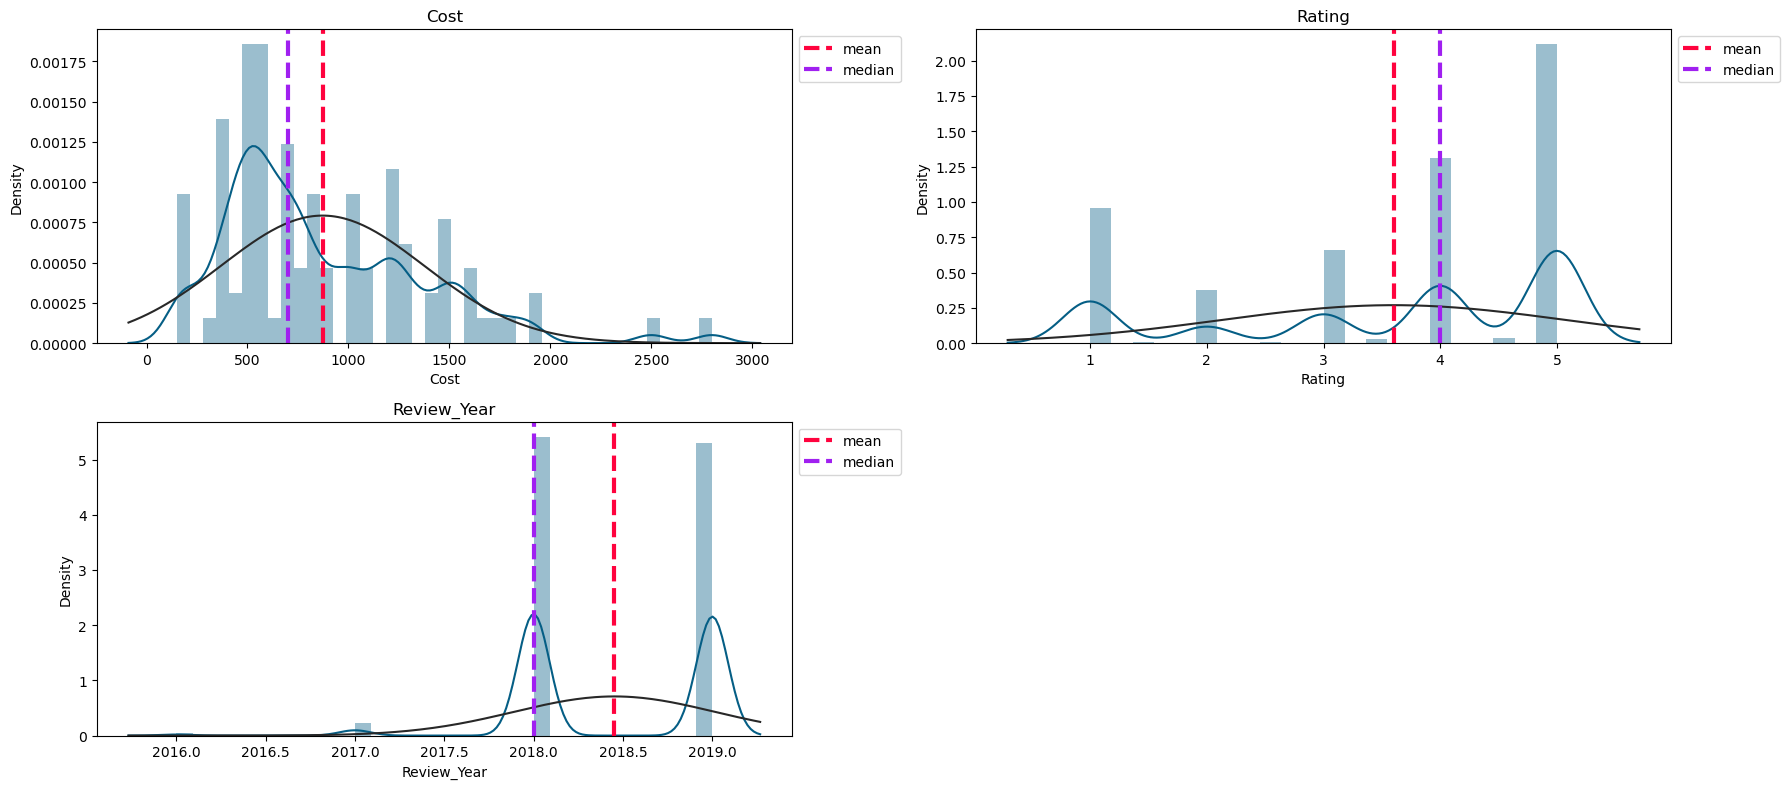

In [60]:
#chart-1 Displot for Distribution
plt.figure(figsize=(18,8))
for i,col in enumerate(['Cost','Rating','Review_Year']):
    plt.subplot(2,2,i+1)
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.title(f'{col.title()}');
    plt.tight_layout();

1. Why were these specific charts chosen?

   The distribution plots (histograms with KDE) were chosen to understand the underlying distribution of key numerical features: Cost, Rating, and Review Year. These plots are essential for identifying skewness, outliers, and the overall shape of the data, which directly influences our analytical approach.

2. What insights were found from the charts?

   Cost: The cost distribution is right-skewed, indicating that the majority of restaurants are in the lower price range. The high-cost outliers pull the mean up, making the median a more reliable measure of the typical price.

   Rating: The rating distribution is multimodal, with distinct peaks at specific rating values. This suggests that customers tend to give very high or very low ratings, with fewer ratings falling in the middle.

   Review Year: The data shows a concentration of reviews in the years 2019 and 2018. This temporal insight helps us understand when the platform experienced the most user engagement.

3. Will the gained insights help create a positive business impact?

   Yes, these insights provide a crucial foundation for strategic business decisions. While no single chart can give a complete picture, these distributions help us understand customer behavior and market dynamics.

   Cost Distribution: The right-skewed price distribution shows a strong market for budget-friendly restaurants. This suggests a business could focus marketing efforts on this segment or, conversely, identify a gap in the high-end market that could be exploited.
 
   Rating Distribution: The multimodal rating distribution is a valuable insight. It suggests a lack of consistent service, with customers either loving or hating their experience. A positive business impact could be to identify the restaurants with low ratings and high review counts and implement a targeted strategy to improve their service.

   Review Year Distribution: The surge in reviews in 2018 is a key insight into our growth. By analyzing what campaigns or events took place that year to drive engagement, we can replicate those successful strategies to encourage more customer feedback and increase user activity in the future.

#### Chart - 2 Maximum Engagement and Lowest Engagement

In [61]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

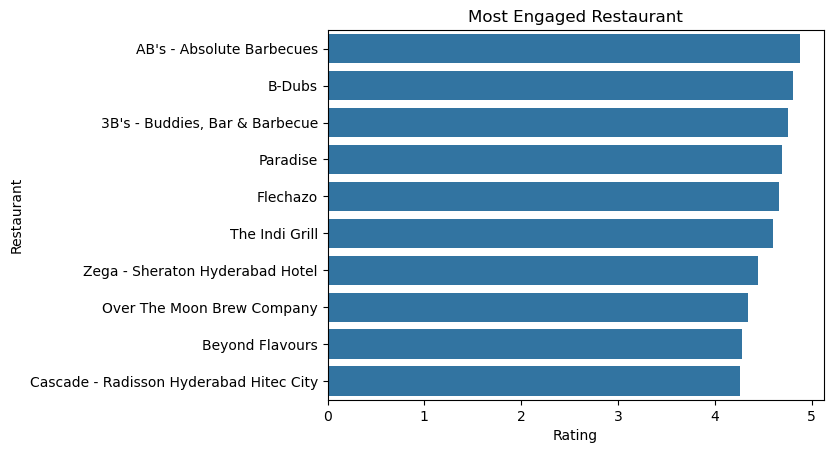

In [62]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

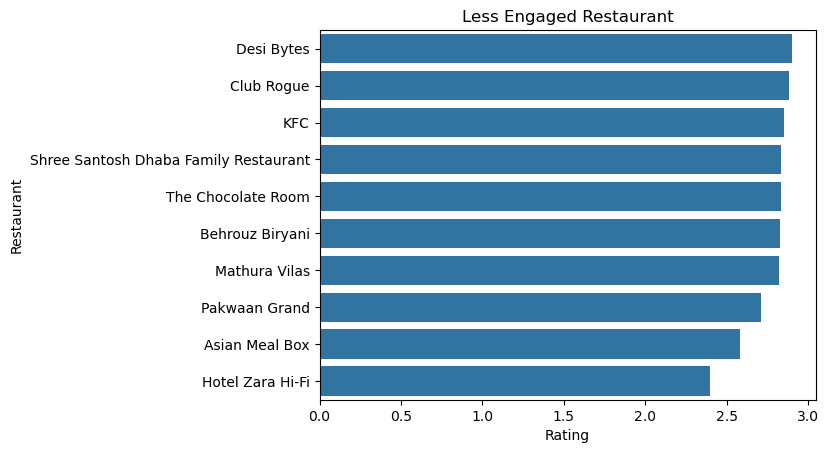

In [63]:
#chart for less liked hotels
sns.barplot(data=most_engaged_hotel[-10:],x='Rating',y='Restaurant')
plt.title("Less Engaged Restaurant")
plt.show()

1. Why did you pick the specific chart?

   I picked barplot for the above graph because it show frequency level for different category.

2. What is/are the insight(s) found from the chart?

   AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

3. Will the gained insights help creating a positive business impact? 
   Are there any insights that lead to negative growth? Justify with specific reason.

   Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

   Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.

#### Chart - 3 Price Point for High Rated and Low Rated Hotels

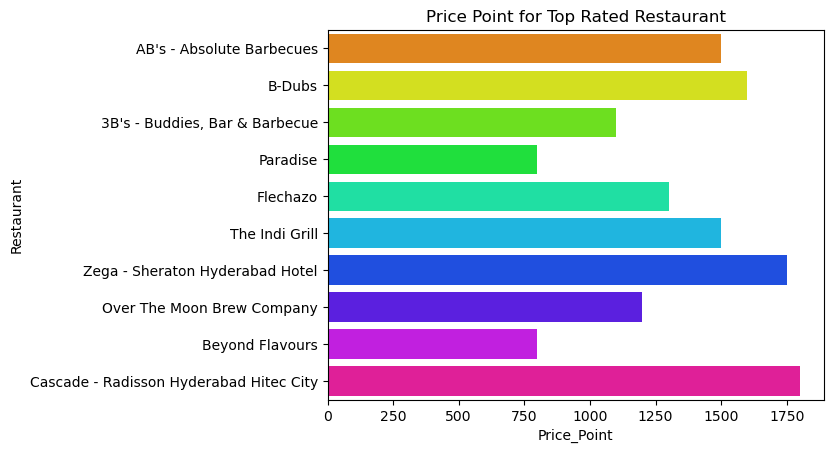

In [64]:
# Chart - 3 visualization code for price point of high rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant', palette = 'hsv')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

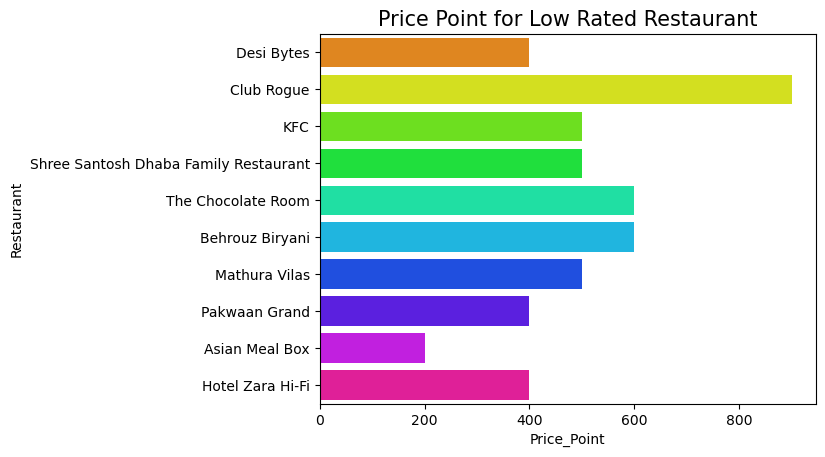

In [65]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method
# ax = plt.axes()
# ax.set_facecolor("black")
plt.show()


1. Why did you pick the specific chart?

   Here I choose barplot because bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart. Also, it allow to have a sense of the price range of each hotel and how they compare to each other.

2. What is/are the insight(s) found from the chart?

   Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.
   
   Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.
   
   Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.
   
   However it can not be finalized that this hotel should unlisted as there may be chance of different cuisine they both serve and it also depend upon the locality they both serve, therefore based on that small promotional offers can also be given for low rated restaurant to increase sales.

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurant

In [66]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:10]

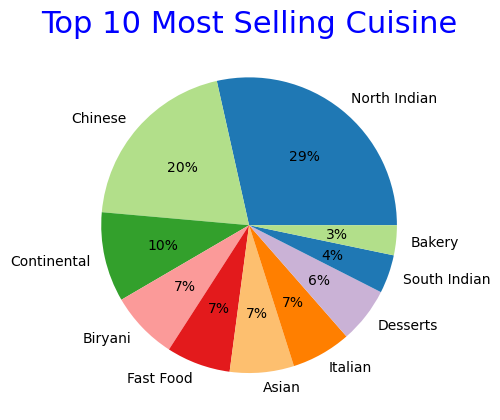

In [67]:
# Chart - 4 visualization code pie chart for top 10 most selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:10]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[1:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 10 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

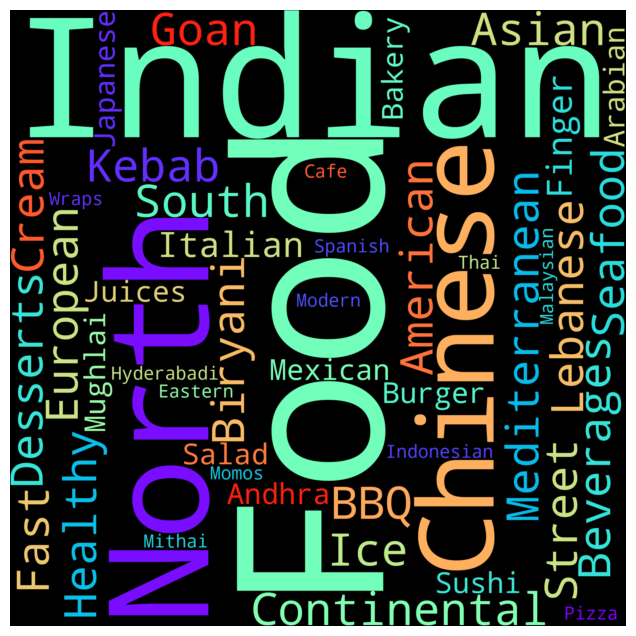

In [68]:
#wordcloud for Cuisine
# storing all cuisine in form of text
plt.figure(figsize=(12,8))
text = " ".join(name for name in cuisine_df.Cuisine )

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");


1. Why did you pick the specific chart?

   Here I choose to use pie chart because it show proportion of each quantity and used wordcloud because it show all text and highlight the most frequent words.

2. What is/are the insight(s) found from the chart?

   Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.
3. Will the gained insights help creating a positive business impact?
   Are there any insights that lead to negative growth? Justify with specific reason.

   Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options.

   If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

   Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.
   
   Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

   Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in customer reviews. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

   However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, it can not tell us if the mentions are positive or negative.

   Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.

#### Chart - 5 Most used Tags

In [69]:
#list of all collections
collection_list=Collections_df.sort_values('Number of Restaurants',ascending=False)['Tags'].to_list()[:5]

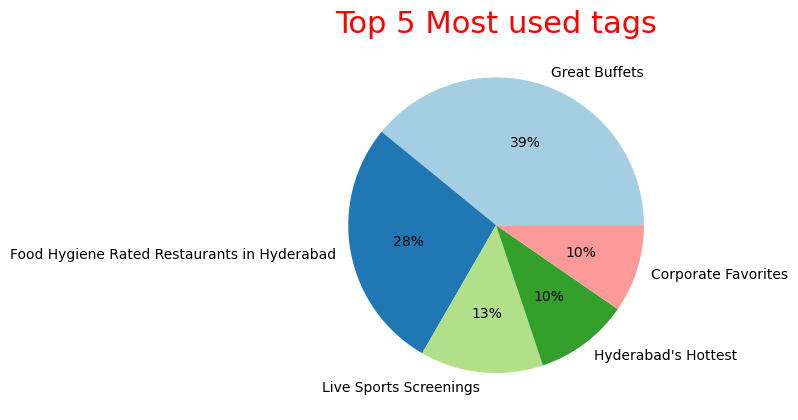

In [70]:
#visualization code pie chart for top 5 most used tags
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most used tags', size =22, color= 'red')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

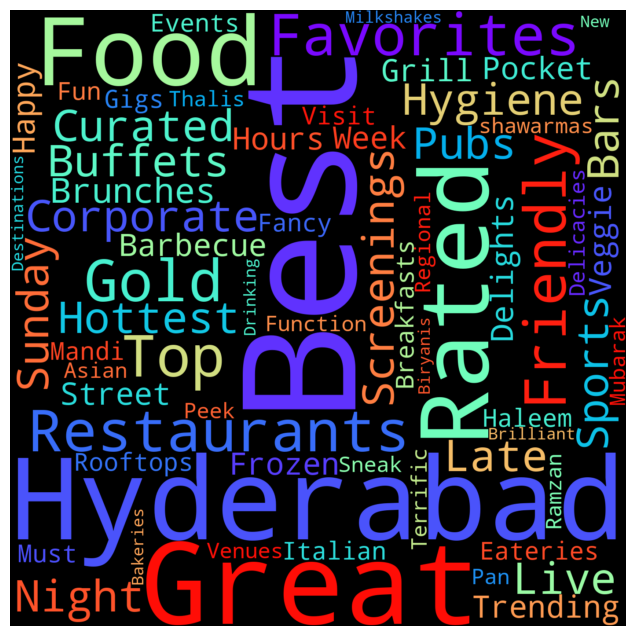

In [71]:
#wordcloud for tags(stroring all tags in form of text)
plt.figure(figsize=(12,8))
text=" ".join(name for name in Collections_df.Tags)

#creating word_clod with text as argument in .generate() method

word_cloud=WordCloud(width=1400,height=1400,collocations=False,colormap='rainbow',background_color='black').generate(text)

#display the generated word cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")

#### What is/are the insight(s) found from the chart?

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

#### Chart - 6 Learn about Reviewers

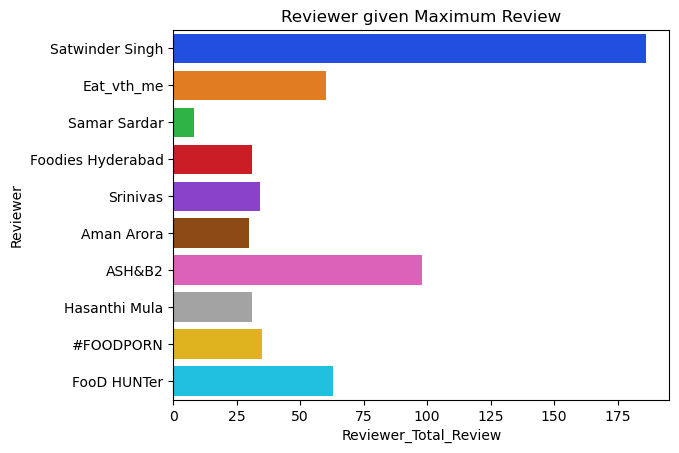

In [72]:
#visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

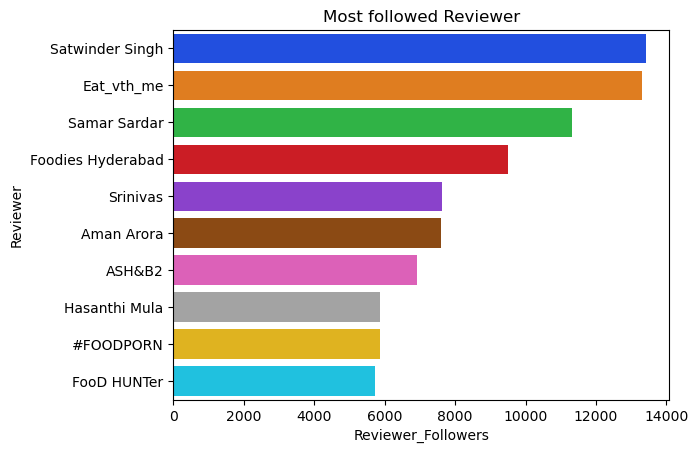

In [73]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

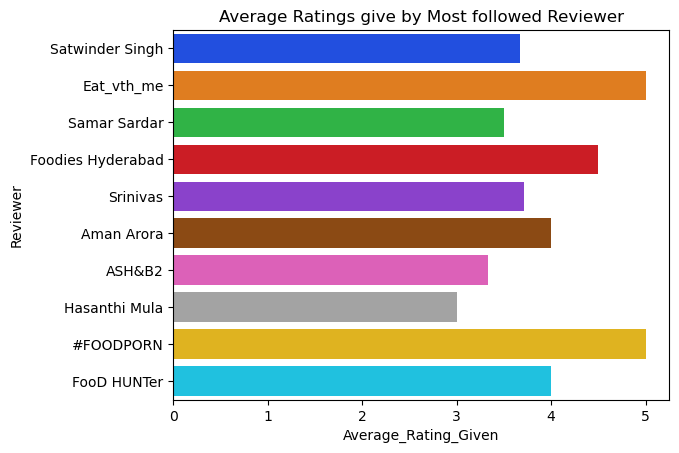

In [74]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()


1. Why did you pick the specific chart?

   Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer. Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc.

2. What is/are the insight(s) found from the chart?

   Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.
   
3. Will the gained insights help creating a positive business impact?
   Are there any insights that lead to negative growth? Justify with specific reason.
   
   This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.
   It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

#### Chart - 7 Hotel with Highest Price and Lowest Price

In [75]:
#extracting name and price 

price_of_hotel = hotelCopy.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

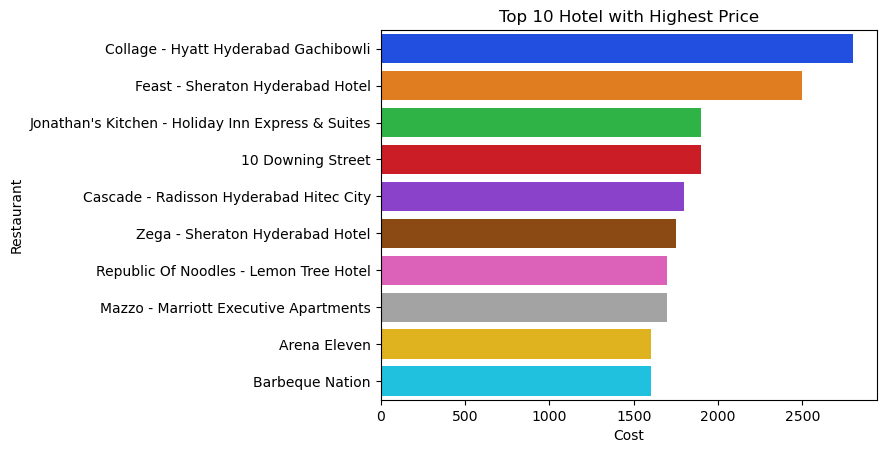

In [76]:
#visualization code for howtel with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

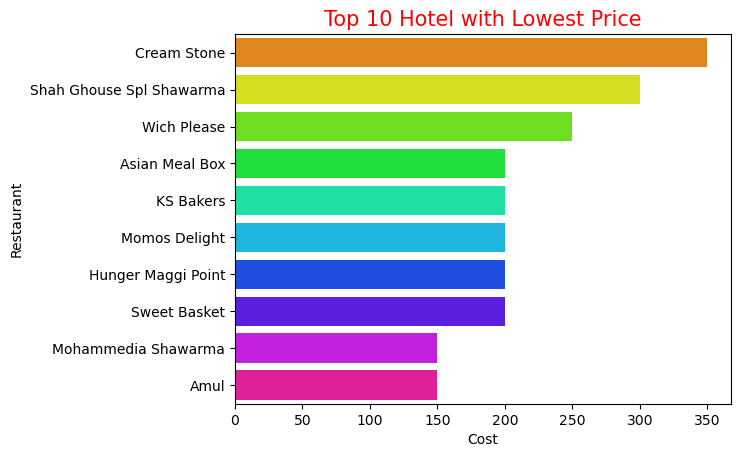

In [77]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

In [78]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotelCopy[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']

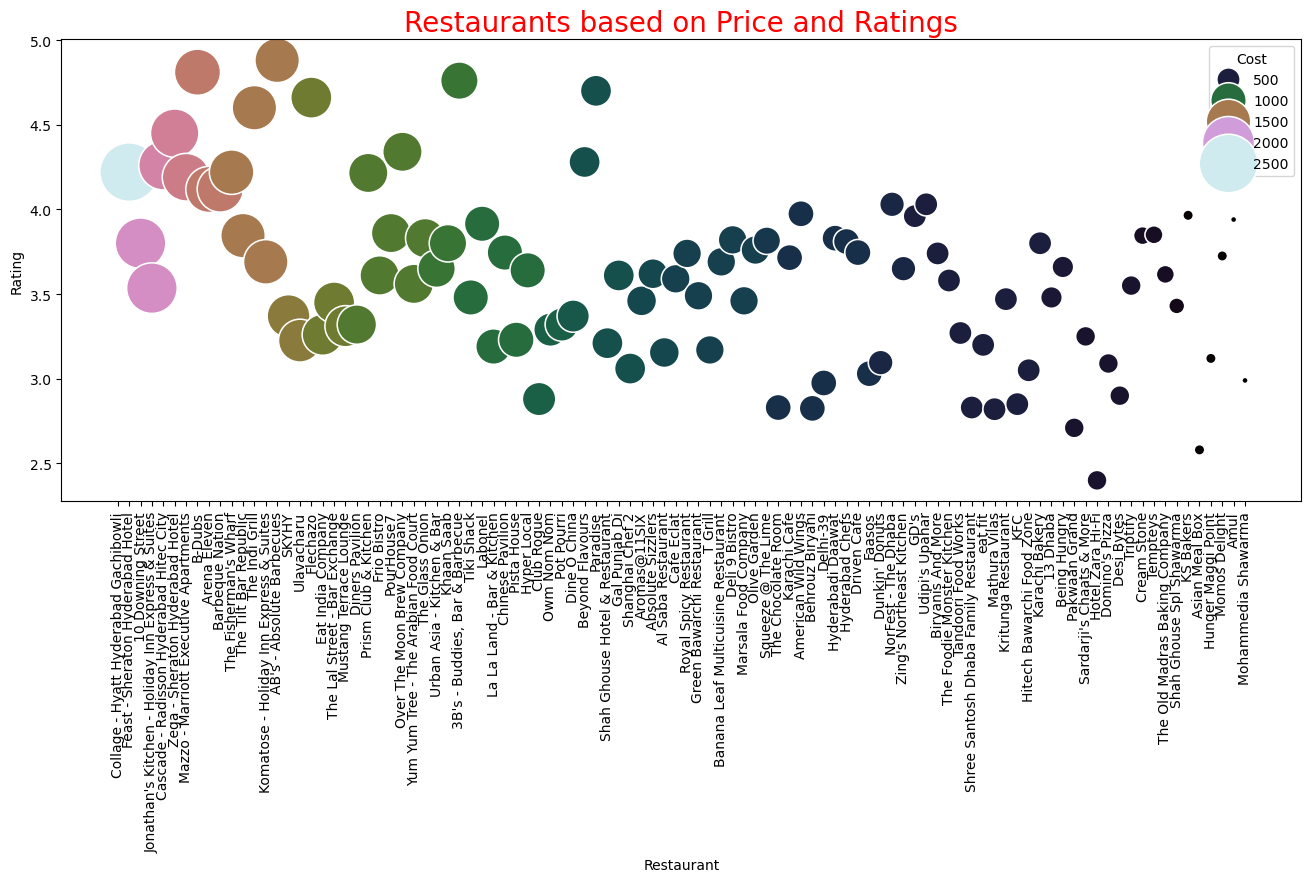

In [79]:
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", hue = 'Cost',legend=True, sizes=(20, 2000),palette ="cubehelix")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

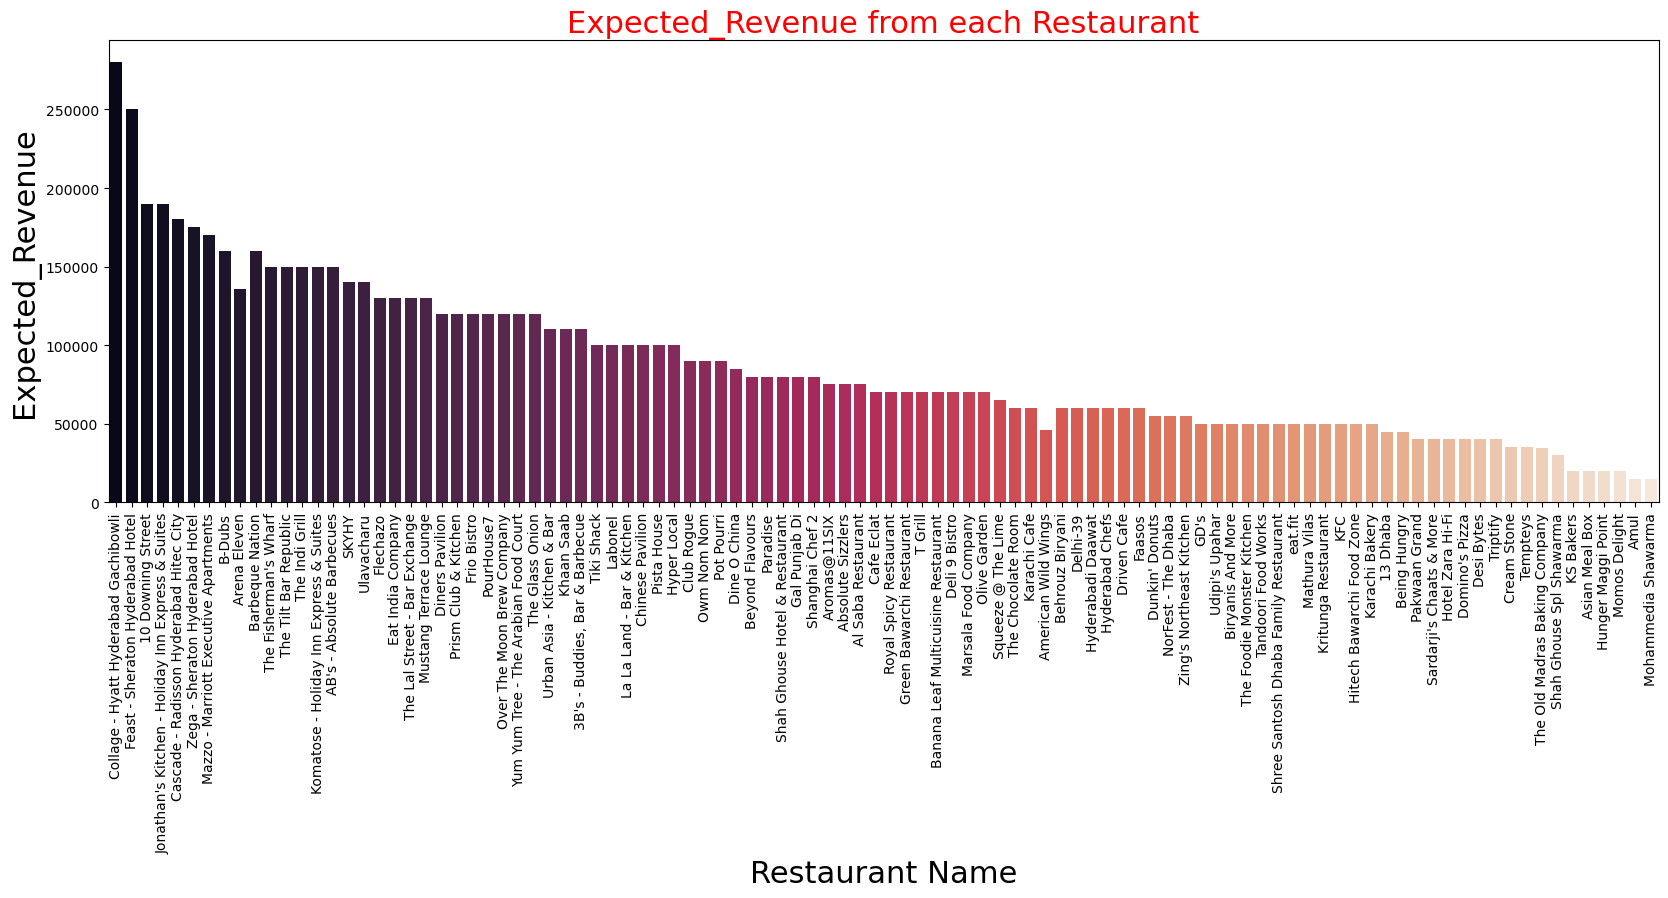

In [80]:
#chart to understand expected revenue
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rocket")
plt.title("Expected_Revenue from each Restaurant", size = 22,color='red')
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()


1. Why did you pick the specific chart?

   Barplot helps in plotting the frquency of cost for each hotel.

2. What is/are the insight(s) found from the chart?

   Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

3. Will the gained insights help creating a positive business impact?
   Are there any insights that lead to negative growth? Justify with specific reason.

   Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market.
   Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.
   Based on the average rating of 3.4 these product should increase their engagement as this may cause negative brand impact. However true behaviour can only be inspected through analysing of reviews.

#### Chart - 8 - Correlation Heatmap

In [81]:
# Convert all columns to numeric, non-numeric columns will become NaN
merged_numeric = merged.apply(pd.to_numeric, errors='coerce')

# Drop columns that were entirely non-numeric (i.e., all NaN after conversion)
merged_numeric = merged_numeric.dropna(axis=1, how='all')

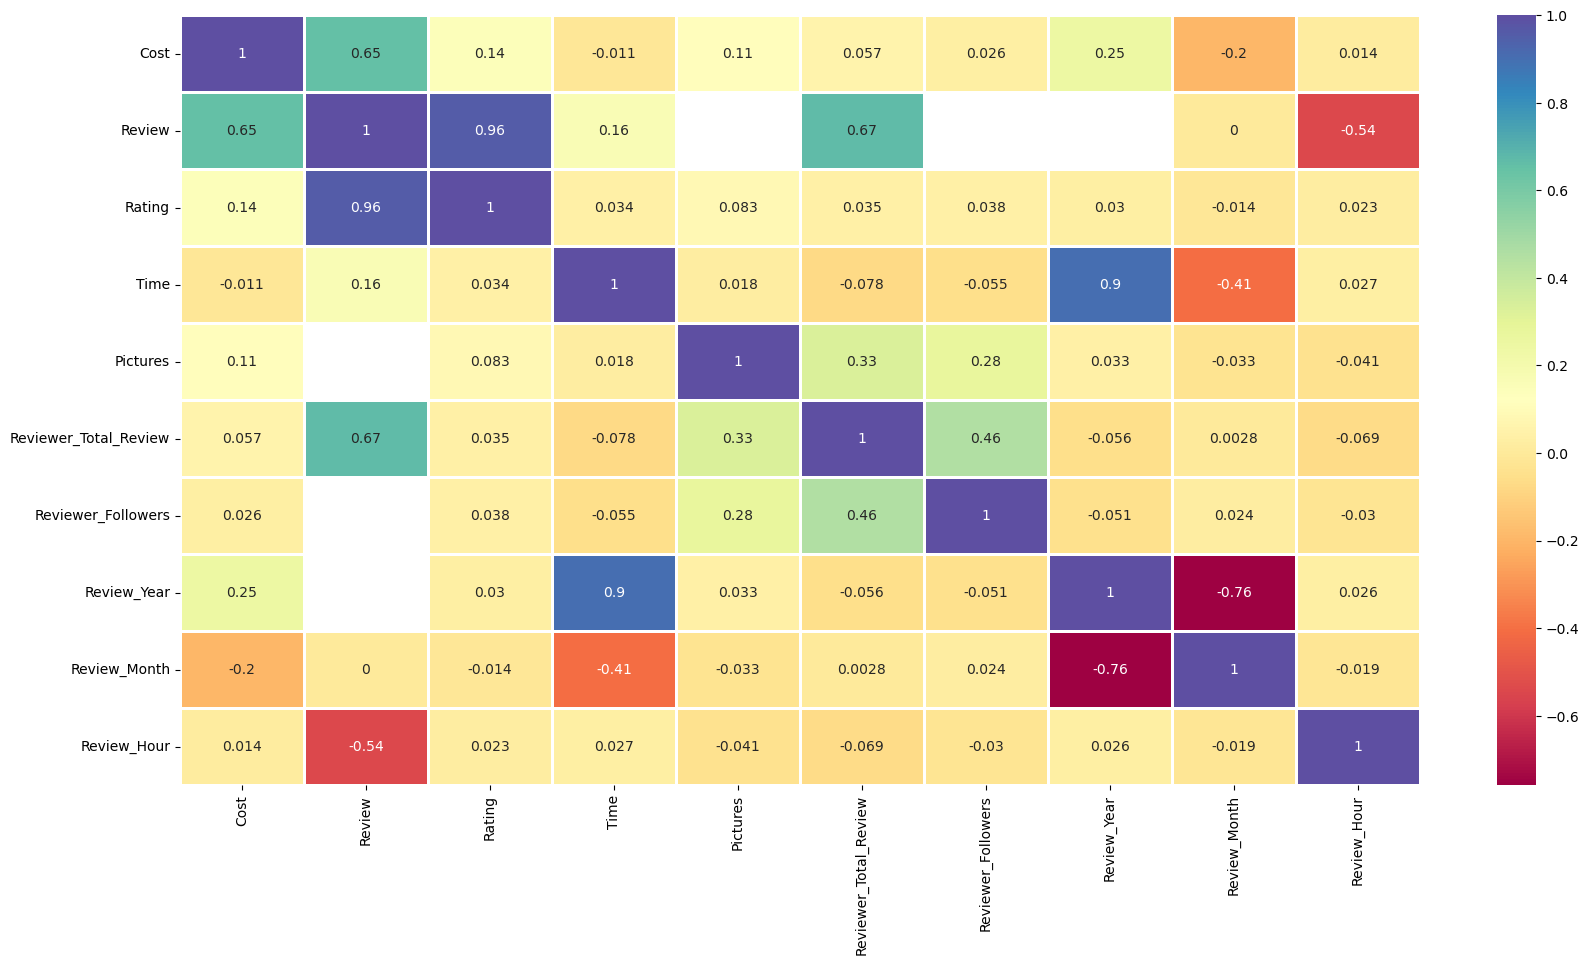

In [82]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_numeric.corr(),ax = ax, annot=True, cmap = 'Spectral', linewidths = 1)

plt.show()

1. Why did you pick the specific chart?

   A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].
   Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

2. What is/are the insight(s) found from the chart?
   
   Feature Importance: The Rating row is the most important if your goal is to predict a restaurant's rating. You can see that Review has a very strong positive correlation (0.96) with Rating, which suggests that the Review feature is a powerful predictor.

   Lack of Relationship: The heatmap shows that Cost has a very weak positive correlation (0.14) with Rating. This is a significant finding. It means that there isn't a strong linear relationship between how expensive a restaurant is and its rating, which is a valuable insight.

### Chart - 9 - Pair Plot 

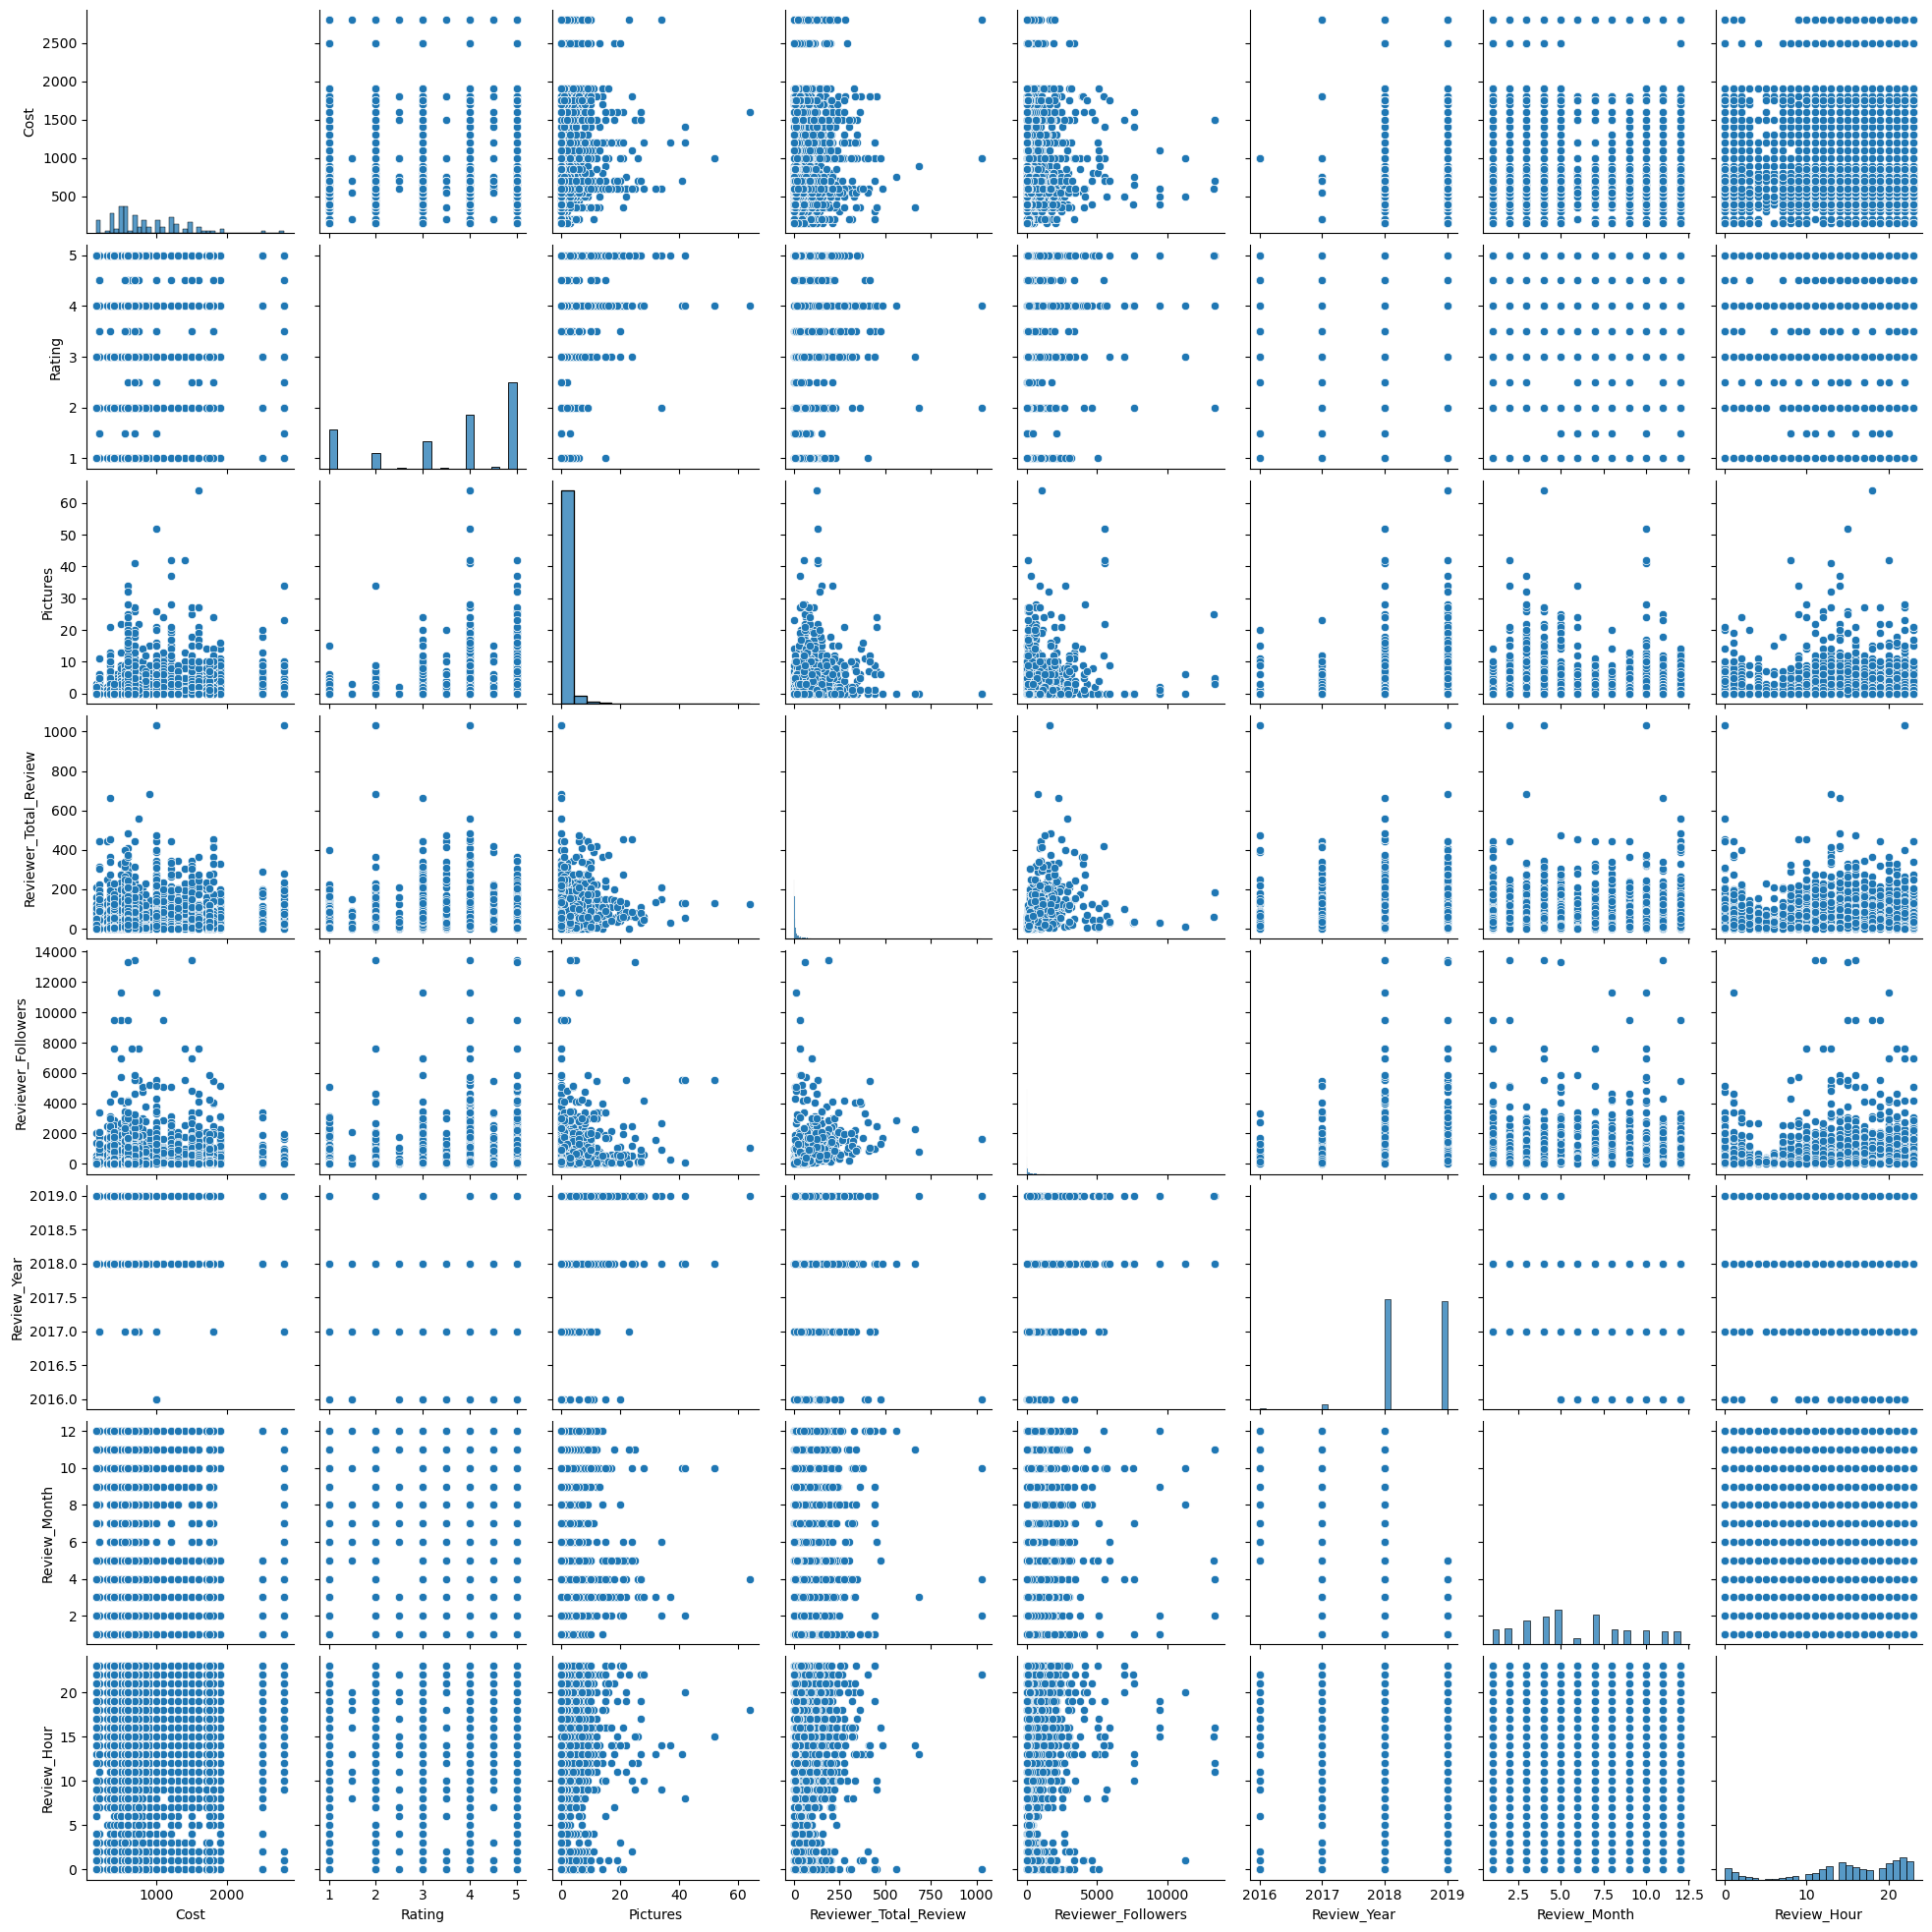

In [83]:
# Pair Plot visualization code
sns.pairplot(merged);

1. Why did you pick the specific chart?

   Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

   Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

2. What is/are the insight(s) found from the chart?

   Price and Rating are Uncorrelated: A weak linear relationship exists between Cost and Rating, showing that price is not a reliable predictor of a restaurant's quality.

   Reviewer Engagement Drives Popularity: There is a strong positive correlation between Reviewer_Total_Review, Pictures, and Reviewer_Followers. Reviewers who contribute more and upload photos tend to have a larger following.

### ***5. Hypothesis Testing***

#### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that are reviewed by reviewers with more followers will have a higher rating.
* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1 

---

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model(Ordinary least value)
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]

print(p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis - There is a statistically significant relationship between the cost of a restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is no statistically significant relationship between the cost of a restaurant and the rating it receives.")

4.595644071494242e-47
Reject Null Hypothesis - There is a statistically significant relationship between the cost of a restaurant and the rating it receives.



1. Which statistical test have you done to obtain P-Value?

   I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating.

2. Why did you choose the specific statistical test?

   I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]
print(p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


0.0004760318830883233
Reject Null Hypothesis



1. Which statistical test have you done to obtain P-Value?

   For the second hypothesis, I have used Simple Linear Regression Test.

2. Why did you choose the specific statistical test?

   I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

### Hypothetical Statement - 3 

---

Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [86]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating    1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
Cuisines                                             
American    1    0    1    0    2    0    8    0   88

In [87]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
print(f"P-value: {p}\n")

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

P-value: 0.0

Reject Null Hypothesis


1. Which statistical test have you done to obtain P-Value?

   For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

2. Why did you choose the specific statistical test?

   I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

### ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

* Since all the duplicated data has NaN values, hence dropping the entire values as it will not help and will create unnecessary noise.

In [88]:
#deleting duplicate value from review dataset
reviewCopy = reviewCopy.drop_duplicates()

In [89]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {reviewCopy.duplicated().value_counts()}, unique values with {len(reviewCopy[reviewCopy.duplicated()])} duplication")

Anymore duplicate left ? False    9964
Name: count, dtype: int64, unique values with 0 duplication


In [90]:
# Handling Missing Values & Missing Value Imputation
hotelCopy.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [91]:
#checking the null value in timing
hotelCopy[hotelCopy['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [92]:
#filling null value in timings column
hotelCopy.Timings.fillna(hotelCopy.Timings.mode()[0], inplace = True)

In [93]:
#checking null values in Collections
missing_percentage = ((hotelCopy['Collections'].isnull().sum())/(len(hotelCopy['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [94]:
#dropping collection column since has more than 50% of null values
hotelCopy.drop('Collections', axis = 1, inplace = True)

In [95]:
#final checking of missing value
hotelCopy.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [96]:
#review missing value
reviewCopy.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        3
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 3
Review_Month                3
Review_Hour                 3
dtype: int64

In [97]:
#checking null reviewer
reviewCopy[reviewCopy['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
8777                    NaN                 NaN          NaN           NaN   
9085                    NaN                 NaN          NaN           NaN   

      Review_Hour  
8777          NaN  
9085          NaN

In [98]:
#checking null Reviewer_Total_Review
reviewCopy[reviewCopy['Reviewer_Total_Review'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
7601                  4.0      4.0    4.0     4.0      4.0  NaT         4   
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
7601                    NaN                 NaN          NaN           NaN   
8777                    NaN                 NaN          NaN           NaN   
9085                    NaN                 NaN          NaN           NaN   

      Review_Hour  
7601          NaN  
8777          NaN  
9085          NaN

In [99]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
reviewCopy = reviewCopy.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [100]:
#again checking the remaining values
null_counts = [(x, a) for x, a in reviewCopy.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [101]:
#filling null values in review and reviewer follower column
reviewCopy = reviewCopy.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [102]:
# final checking null values
reviewCopy.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [103]:
#merging both dataset
merged = hotelCopy.merge(reviewCopy, on = 'Restaurant')
merged.shape

(9961, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I started treating missing values by first removing the duplicate data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value I removed it as it was only 36 duplicate data which had no unique identity.

Dataset that contains details about hotel, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer             -       2,
Review               -       9,
Rating               -       2,
Metadata             -       2,
Time                 -       2,
Reviewer_Total_Review-       3,
Reviewer_Followers   -    1581,
Review_Year          -       2,
Review_Month         -       2,
Review_Hour          -       2. 
On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

#### Anamoly Detection

In [104]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest
#checking for normal distribution 
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


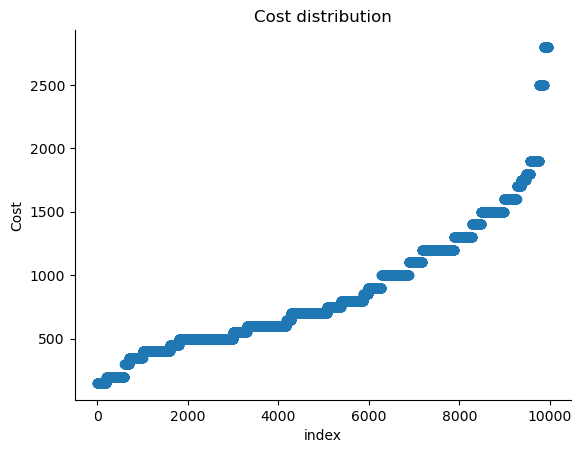

In [105]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

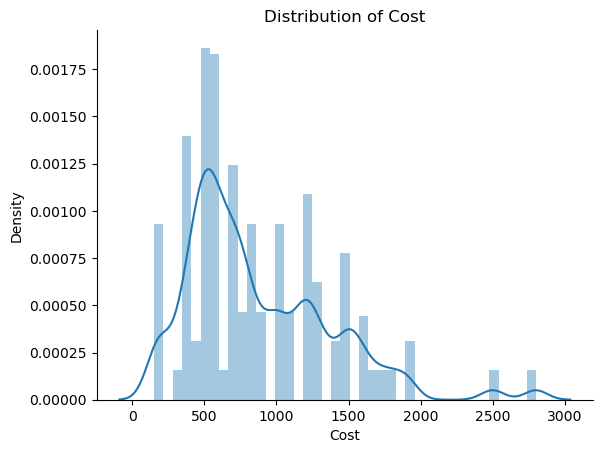

In [106]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

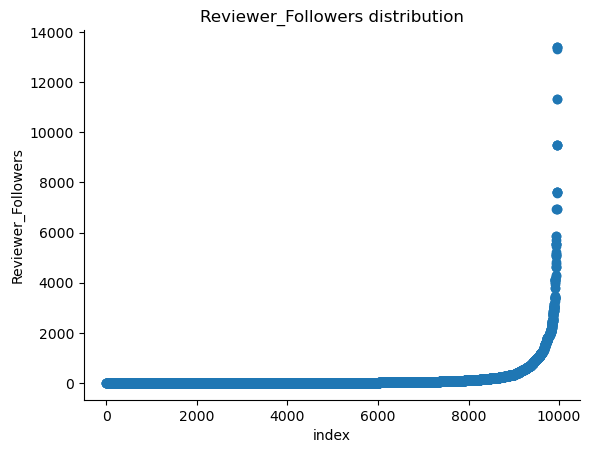

In [107]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

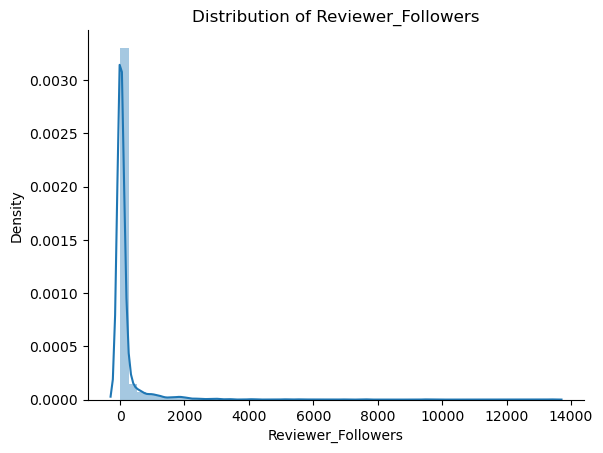

In [108]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

* For Cost: The distribution is heavily skewed, with a few restaurants having a much higher cost than the rest. These are a small number of very expensive establishments that are statistically considered outliers or anomalies.

* For Reviewer_Followers: The data is even more severely skewed. The vast majority of reviewers have very few followers, while a small group of influential reviewers have an extremely high follower count. These are also considered anomalies.

In [109]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

In [110]:
merged.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                    1.0                 2.0       2019.0           5.0   
1                    3.0                 2.0       2019.0           5.0   
2                    2.0                 3.0       2019.0           5.0   
3                    1.0                 1.0       2019.0           5.0   
4                    3.0                 2.0       2019.0           5.0   

   Review_Hour  anomaly_score_univariate_Cost  outlier_univariate_Cost  
0         15.0                       0.277174                        1  
1         14.0                       0.277174                        1  
2         22.0                       0.277174                        1  
3         22.0                       0.277174                        1  
4         21.0                       0.277174                        1

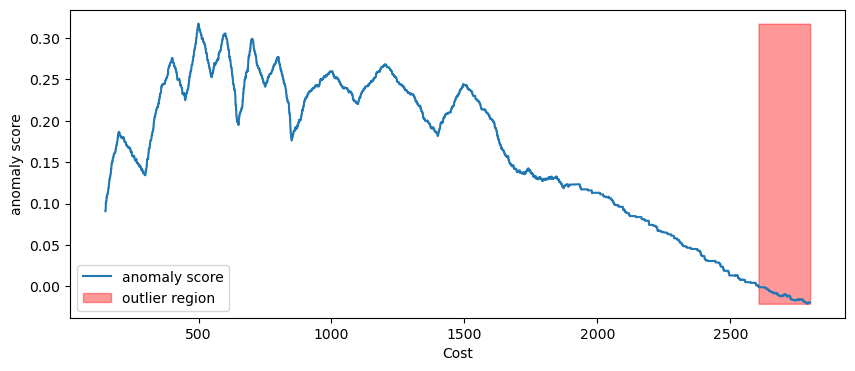

In [111]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),where=outlier==-1, color='r',alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show()

In [112]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(merged['Reviewer_Followers'].values.reshape(-1, 1))

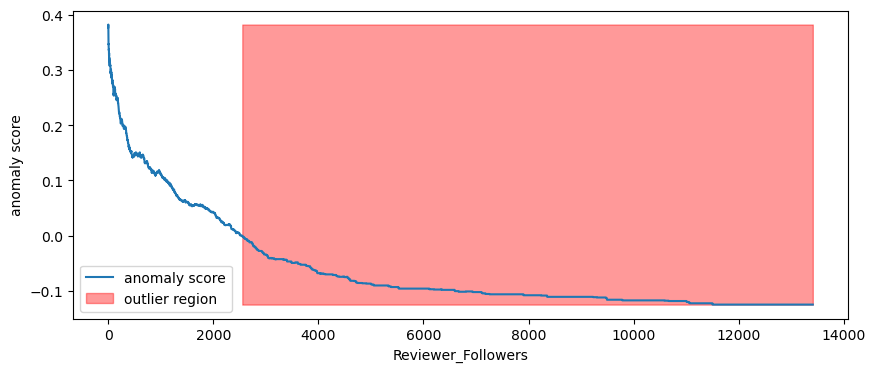

In [113]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),where=outlier==-1, color='r',alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show()

In [114]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().drop("Time",axis=1).columns:
  print(abs(merged[i].mean()-merged[i].median()))
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

171.58417829535188
0.39895592811966685
0.7514305792591105
19.992069069370544
156.00843288826422
0.4520630458789583
1.0179700833249674
0.8122678445939169
0.014522991426404452
0.020078305391024953
0.029698985366240105
0.01947595622929421
Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [115]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [116]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotelCopy.loc[hotelCopy['Cost']<= outlier_treatment_skew(df=hotelCopy,feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotelCopy,feature='Cost')[1]

#upper limit capping
hotelCopy.loc[hotelCopy['Cost']>= outlier_treatment_skew(df=hotelCopy,feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotelCopy,feature='Cost')[0]

upper : 2250.0 lower : -550.0
upper : 2250.0 lower : -550.0
upper : 2250.0 lower : -550.0
upper : 2250.0 lower : -550.0


In [117]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
reviewCopy.loc[reviewCopy['Reviewer_Followers']<= outlier_treatment_skew(df=reviewCopy,feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(df=reviewCopy,feature='Reviewer_Followers')[1]

#upper limit capping
reviewCopy.loc[reviewCopy['Reviewer_Followers']>= outlier_treatment_skew(df=reviewCopy,feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(df=reviewCopy,feature='Reviewer_Followers')[0]

upper : 156.0 lower : -92.0
upper : 156.0 lower : -92.0
upper : 156.0 lower : -92.0
upper : 156.0 lower : -92.0


In [118]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost','anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

#### What all outlier treatment techniques have you used and why did you use those techniques?

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

### 3. Categorical Encoding

In [119]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotelCopy[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [120]:
#total cuisine count 
hotelCopy['Total_Cuisine_Count'] = hotelCopy['Cuisines'].apply(lambda x : len(x.split(',')))
print(hotelCopy['Total_Cuisine_Count'])

0      6
1      3
2      4
3      5
4      5
      ..
100    2
101    2
102    3
103    1
104    4
Name: Total_Cuisine_Count, Length: 105, dtype: int64


In [121]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotelCopy = hotelCopy.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotelCopy.head(1)

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [122]:
#adding cost column to the new dataset 
cluster_dummy = hotelCopy[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count','Cuisines']].merge(cluster_dummy, on = 'Restaurant')

In [123]:
cluster_dummy.shape

(100, 49)

In [124]:
cluster_dummy.head(2).T

0  \
Restaurant                                             Beyond Flavours   
Cost                                                               800   
Average_Rating                                                    4.28   
Total_Cuisine_Count                                                  6   
Cuisines             Chinese, Continental, Kebab, European, South I...   
American                                                             0   
Andhra                                                               0   
Arabian                                                              0   
Asian                                                                0   
BBQ                                                                  0   
Bakery                                                               0   
Beverages                                                            0   
Biryani                                                              0   
Burger                                                               0   
Cafe                                                                 0   
Chinese                                                              1   
Continental                                                          1   
Desserts                                                             0   
European                                                             1   
Fast Food                                                            0   
Finger Food                                                          0   
Goan                                                                 0   
Healthy Food                                                         0   
Hyderabadi                                                           0   
Ice Cream                                                            0   
Indonesian                                                           0   
Italian                                                              0   
Japanese                                                             0   
Juices                                                               0   
Kebab                                                                1   
Lebanese                                                             0   
Malaysian                                                            0   
Mediterranean                                                        0   
Mexican                                                              0   
Mithai                                                               0   
Modern Indian                                                        0   
Momos                                                                0   
Mughlai                                                              0   
North Eastern                                                        0   
North Indian                                                         1   
Pizza                                                                0   
Salad                                                                0   
Seafood                                                              0   
South Indian                                                         1   
Spanish                                                              0   
Street Food                                                          0   
Sushi                                                                0   
Thai                                                                 0   
Wraps                                                                0   

                                                  1  
Restaurant                                 Paradise  
Cost                                            800  
Average_Rating                                  4.7  
Total_Cuisine_Count                               3  
Cuisines             Biryani, North Indian, Chinese  
American                                    

In [125]:
#creating data frame for categorial encoding
cluster_df = hotelCopy[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [126]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [127]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [128]:
#result from encoding
cluster_df.head(2).T

0  \
Restaurant                                             Beyond Flavours   
Cuisines             Chinese, Continental, Kebab, European, South I...   
Cost                                                             800.0   
Average_Rating                                                    4.28   
Total_Cuisine_Count                                                6.0   
Chinese                                                              1   
Continental                                                          1   
Kebab                                                                1   
European                                                             1   
South Indian                                                         1   
North Indian                                                         1   
Biryani                                                              0   
Asian                                                                0   
Mediterranean                                                        0   
Desserts                                                             0   
Seafood                                                              0   
Beverages                                                            0   
Goan                                                                 0   
Healthy Food                                                         0   
Lebanese                                                             0   
American                                                             0   
Ice Cream                                                            0   
Street Food                                                          0   
Fast Food                                                            0   
BBQ                                                                  0   
Italian                                                              0   
Finger Food                                                          0   
Burger                                                               0   
Japanese                                                             0   
Salad                                                                0   
Sushi                                                                0   
Mexican                                                              0   
Mughlai                                                              0   
Andhra                                                               0   
Bakery                                                               0   
Juices                                                               0   
Arabian                                                              0   
Hyderabadi                                                           0   
Cafe                                                                 0   
Spanish                                                              0   
Wraps                                                                0   
Thai                                                                 0   
Indonesian                                                           0   
Modern Indian                                                        0   
Momos                                                                0   
Pizza                                                                0   
North Eastern                                                        0   
Mithai                                                               0   
Malaysian                                                            0   

                                                  1  
Restaurant                                 Paradise  
Cuisines             Biryani, North Indian, Chinese  
Cost                                          800.0  
Average_Rating                                  4.7  
Total_Cuisine_Count                             3.0  
Chinese                                     

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0.
Benefit of using one hot encoding:

* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing - Review
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [129]:
#creating new df for text processing of sentiment analysis
sentiment_df = reviewCopy[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer        Restaurant  Rating  \
9990  Akram Ul Haq  Chinese Pavilion     5.0   
7862  Rajesh Kumar        Khaan Saab     5.0   

                                                 Review  
9990  Amazing food ! I always go here when I want Ch...  
7862  Woooow! I found a place with great food and ex...

In [130]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [131]:
sentiment_df.sample(2)

index           Reviewer                               Restaurant  \
9124   9124     Arun Arunkumar  Cascade - Radisson Hyderabad Hitec City   
0         0  Rusha Chakraborty                          Beyond Flavours   

      Rating                                             Review  
9124     5.0  I had a good experience with Radisson team and...  
0        5.0  The ambience was good, food was quite good . h...

#### 2. Lower Casing

In [132]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

#### 3. Removing Punctuations

In [133]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [134]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index           Reviewer                 Restaurant  Rating  \
3794   3794  Nallaballe Suresh        Kritunga Restaurant     5.0   
204     204   Samujjwal Baruah                   Flechazo     5.0   
1790   1790       Abdul Gaffar           Hotel Zara Hi-Fi     5.0   
7251   7251        Jaya Narang                    Labonel     5.0   
3580   3580        Rajuvadla12  Green Bawarchi Restaurant     5.0   

                                                 Review  
3794                                               good  
204   would have rated 6 1 for the music had it not ...  
1790                                  very good service  
7251  one of the best bakeries in hyderabad i say on...  
3580                                               good

#### 4. Removing URLs & Removing words and digits contain digits.

In [135]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [136]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotelCopy['Location'] = hotelCopy['Links'].apply(get_location)
hotelCopy.sample(2)

Restaurant  \
10  Sardarji's Chaats & More   
6                    eat.fit   

                                                Links  Cost  \
10  https://www.zomato.com/hyderabad/sardarjis-cha...   400   
6   https://www.zomato.com/hyderabad/eat-fit-gachi...   500   

                                             Cuisines  \
10               Street Food, North Indian, Fast Food   
6   Healthy Food, North Indian, Continental, South...   

                                 Timings  Total_Cuisine_Count  Average_Rating  \
10  12 Noon to 3:30 PM, 7 PM to 10:30 PM                    3            3.25   
6                          7 AM to 10 PM                    4            3.20   

     Location  
10  hyderabad  
6   hyderabad

#### 5. Removing Stopwords & Removing White spaces

In [137]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [138]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [139]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)
print(sentiment_df['Review'].head())

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object


In [140]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))
sentiment_df.sample(5)

index                Reviewer                           Restaurant  \
3601   3601  Sambasiva Rao Kurakula  Banana Leaf Multicuisine Restaurant   
3113   3113         Ayesha Tabassum                          Pista House   
2504   2504               Soumi Sur                           Tiki Shack   
6021   6021          Sayan Pattnaik                           PourHouse7   
9342   9342       Sai Kiran Bolloju             Zing's Northeast Kitchen   

      Rating                                             Review  
3601     1.0  lot discrimination zomato gold customers regul...  
3113     5.0  best place hangout reasonable tastywith proper...  
2504     5.0  lovely place hangout friends surely one favour...  
6021     4.0  awesome place waiters good behaviour dj awesom...  
9342     1.0  forget rating given restaurant place crap say ...

#### 6. Tokenization

In [141]:
nltk.download('punkt_tab')
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(5)

[nltk_data] Downloading package punkt_tab to C:\Users\Siddharth
[nltk_data]     Shukla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


index             Reviewer                       Restaurant  Rating  \
5571   5571     Harshad Kulkarni                       Cafe Eclat     4.0   
9713   9713  Sachin Narayan Iyer  Zega - Sheraton Hyderabad Hotel     4.0   
195     195     Rathod Sangeetha                         Paradise     5.0   
9026   9026        Neal Kesharia                     Arena Eleven     5.0   
6814   6814                   RM            The Tilt Bar Republic     4.0   

                                                 Review  
5571  [good, italian, food, excellent, ambience, lov...  
9713  [amazing, place, variety, dishes, drinks, enjo...  
195   [chiken, musallam, really, good, dat, keema, a...  
9026  [avhishek, guy, meet, excellent, host, host, w...  
6814  [quite, expensive, fair, good, ambiance, great...

#### 7. Text Normalization

In [142]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)
sentiment_df.sample(5)

index         Reviewer              Restaurant  Rating  \
9567   9567    Chandu Sekhar       Hyderabadi Daawat     1.0   
142     142  Mahender Chenna                Paradise     5.0   
3050   3050        Jay Mehta              Pot Pourri     3.0   
5346   5346    Subhash Shahu         Diners Pavilion     2.0   
2677   2677      Prem Kalyan  Mustang Terrace Lounge     1.0   

                                                 Review  
9567  [appropriate, response, issue, served, spoiled...  
142   [tanduri, chiken, good, chiken, biriyani, good...  
3050  [ordered, honey, chilli, potato, veg, manchuri...  
5346  [today, teammate, food, non, vegetarian, mark,...  
2677  [place, refused, replace, quarter, plate, serv...

##### Which text normalization technique have you used and why?

I have used **Lemmatization** as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

---

**Other Method for Normalization**

---
Tokenization is the process of breaking down a sentence or a piece of text into individual words or tokens. Tokenization is an important step in natural language processing as it allows us to work with individual words rather than the entire text.

Stemming is the process of reducing words to their base or root form. This is useful in natural language processing because it allows us to reduce the dimensionality of the data by converting words to their common form. This can help improve the performance of models by reducing the number of unique words that need to be processed.

Stemming can be used because they are common normalization techniques used in natural language processing to preprocess text data before it is fed into a model. Tokenization is the first step and it breaks down the text into individual words, which is necessary for most NLP tasks. Stemming is used to reduce the dimensionality of the data by converting words to their common form, this is useful for text classification and other NLP tasks where the meaning of the words is important.

⚡In general, stemming is a more aggressive technique that can remove more of the original word form, which may make it difficult for a lemmatizer to accurately identify the base form of the word. Additionally, some stemming algorithms may create non-real words, which are difficult for a lemmatizer to handle.
Therefore, if the goal is to maintain the meaning of the text and preserve more of the original word forms, it would be more appropriate to apply lemmatization before stemming. However, if the goal is to reduce all words to their base forms and to group together different forms of the same word, it may be useful to try both ways and compare the results.

#### 8. Text Vectorization

In [143]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [144]:
print(f'Shape of TF-IDF matrix: {X_tfidf.shape}')

Shape of TF-IDF matrix: (9961, 17430)


In [145]:
print(X_tfidf)

  (0, 405)	0.12011845411442172
  (0, 486)	0.10606369183180228
  (0, 2038)	0.24345223897197232
  (0, 2635)	0.22327506565697147
  (0, 3289)	0.20712119130286474
  (0, 3341)	0.1858543174047504
  (0, 3623)	0.2912397976523078
  (0, 4608)	0.2989087934333801
  (0, 5511)	0.06996091671680622
  (0, 5739)	0.1402651143796611
  (0, 6199)	0.21001142583127422
  (0, 6785)	0.215728547930473
  (0, 8780)	0.15871817403059404
  (0, 10378)	0.11368231091658669
  (0, 10867)	0.2961836342778372
  (0, 11302)	0.07829130891579725
  (0, 12033)	0.1664915882212991
  (0, 12248)	0.12173851977679652
  (0, 13071)	0.37577057269074676
  (0, 13092)	0.21820912958042296
  (0, 14017)	0.3163608075928381
  (0, 16395)	0.1869993002095568
  (1, 486)	0.1500402535526097
  (1, 3623)	0.411994833761393
  (1, 4857)	0.26792120273345466
  :	:
  (9960, 8784)	0.31261363936469483
  (9960, 8972)	0.11341455175091356
  (9960, 9258)	0.06792983755048983
  (9960, 9373)	0.0994419977609086
  (9960, 9435)	0.1224670877108172
  (9960, 9538)	0.07199041142



---

**Bag of Words**

In [146]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict 
tokens_dict.token2id

{'also': 0,
 'ambience': 1,
 'brunch': 2,
 'chill': 3,
 'cost': 4,
 'courteous': 5,
 'da': 6,
 'effective': 7,
 'food': 8,
 'friend': 9,
 'good': 10,
 'helpful': 11,
 'lunch': 12,
 'one': 13,
 'parent': 14,
 'place': 15,
 'quite': 16,
 'really': 17,
 'sate': 18,
 'saturday': 19,
 'soumen': 20,
 'waiter': 21,
 'evening': 22,
 'experience': 23,
 'kudos': 24,
 'pleasant': 25,
 'prompt': 26,
 'service': 27,
 'alfredo': 28,
 'amazing': 29,
 'background': 30,
 'great': 31,
 'music': 32,
 'must': 33,
 'pasta': 34,
 'penne': 35,
 'personal': 36,
 'pradeep': 37,
 'recommendation': 38,
 'subroto': 39,
 'thnx': 40,
 'try': 41,
 'arun': 42,
 'behavior': 43,
 'course': 44,
 'guy': 45,
 'like': 46,
 'sincerety': 47,
 'visit': 48,
 'would': 49,
 'basket': 50,
 'biryani': 51,
 'drumstick': 52,
 'enjoyed': 53,
 'goodwe': 54,
 'kodi': 55,
 'mutton': 56,
 'ordered': 57,
 'served': 58,
 'thanks': 59,
 'well': 60,
 'ambiance': 61,
 'apradeecp': 62,
 'best': 63,
 'caption': 64,
 'hostess': 65,
 'papiya': 66

In [147]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head(10)

doc_index           doc_id      token  bow
0          0  Beyond Flavours       also    1
1          0  Beyond Flavours   ambience    1
2          0  Beyond Flavours     brunch    1
3          0  Beyond Flavours      chill    1
4          0  Beyond Flavours       cost    1
5          0  Beyond Flavours  courteous    1
6          0  Beyond Flavours         da    1
7          0  Beyond Flavours  effective    1
8          0  Beyond Flavours       food    1
9          0  Beyond Flavours     friend    1

##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [148]:
# Manipulate Features to minimize feature correlation and create new features
hotelCopy.shape

(100, 8)

In [149]:
#columns for dataset
hotelCopy.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [150]:
#dropping columns
hotelCopy = hotelCopy.drop(columns = ['Links','Location'], axis = 1)

In [151]:
hotelCopy.shape

(100, 6)

In [152]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df.shape

(100, 49)

In [153]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [154]:
cluster_df.sample(1)

Cost  Average_Rating  Total_Cuisine_Count Chinese Continental Kebab  \
94  550.0           3.095                  5.0       0           0     0   

   European South Indian North Indian Biryani  ... Spanish Wraps Thai  \
94        0            0            0       0  ...       0     0    0   

   Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
94          0             0     0     0             0      0         0  

[1 rows x 47 columns]

In [155]:
#dropping cuisine from cluster_dummy
cluster_dummy = cluster_dummy.drop(columns = ['Cuisines'], axis = 1)

In [156]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 48)

In [157]:
#review data shape
reviewCopy.shape

(9961, 12)

In [158]:
#review column
reviewCopy.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [159]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [160]:
#sentiment data frame
sentiment_df.sample(2)

index        Reviewer    Restaurant  Rating  \
7949   7949   Priya Nagwani  Olive Garden     5.0   
883     883  Koushal Koshik   Hyper Local     5.0   

                                                 Review  Sentiment  
7949  [delicious, food, good, quantity, ordered, veg...          1  
883   [great, time, dining, hyper, local, nonveg, pl...          1

#### 2. Feature Selection

In [161]:
hotelCopy.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [162]:
#feature selcted for clustering 
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [163]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [164]:
reviewCopy.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [165]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### Select your features wisely to avoid overfitting

I will be usign **PCA for feature selection**, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

##### Which all features you found important and why?

Sentiment Score (Sentiment): This is the most important feature. The sentiment score you will derive from the text reviews is a direct numerical representation of the opinion expressed in the review. A positive sentiment score should have a strong positive correlation with a high rating.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [166]:
# # detecting outliers using zcsore method
# from scipy import stats
# z = np.abs(stats.zscore(cluster_df[['Cost']]))
# print(z)
# cluster_df=cluster_df[(z<3).all(axis=1)]
# cluster_df.shape

In [167]:
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [168]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

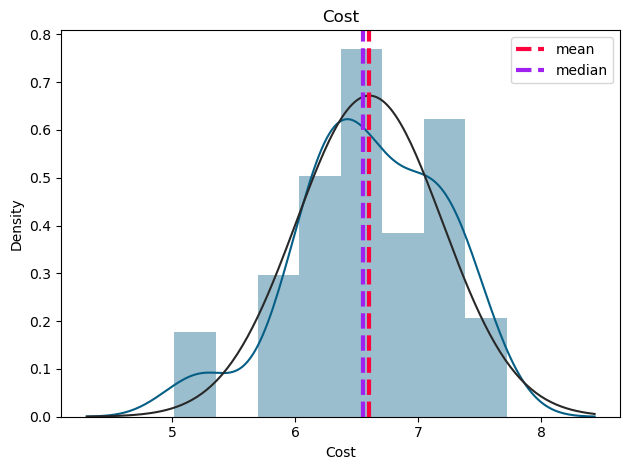

In [169]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}')
    plt.tight_layout()

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

### 6. Data Scaling

In [170]:
# Scaling your data
cluster_dummy.sample(5)

Restaurant      Cost  Average_Rating  \
44               La La Land - Bar & Kitchen  6.908755            3.19   
65  Komatose - Holiday Inn Express & Suites  7.313887            3.69   
47                          Shanghai Chef 2  6.685861            3.06   
16                      NorFest - The Dhaba  6.311735            4.03   
5                     The Fisherman's Wharf  7.313887            4.22   

    Total_Cuisine_Count  American  Andhra  Arabian  Asian  BBQ  Bakery  ...  \
44                    4         0       0        0      0    0       0  ...   
65                    4         0       0        0      0    0       0  ...   
47                    4         0       0        0      1    0       0  ...   
16                    1         0       0        0      0    0       0  ...   
5                     5         0       0        0      1    0       0  ...   

    North Indian  Pizza  Salad  Seafood  South Indian  Spanish  Street Food  \
44             1      0      0        0             0        0            0   
65             1      0      0        0             0        0            0   
47             0      0      0        0             0        0            0   
16             1      0      0        0             0        0            0   
5              1      0      0        1             0        0            0   

    Sushi  Thai  Wraps  
44      0     0      0  
65      1     0      0  
47      0     1      0  
16      0     0      0  
5       0     0      0  

[5 rows x 48 columns]

In [171]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.

### 7. Dimesionality Reduction

In [172]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

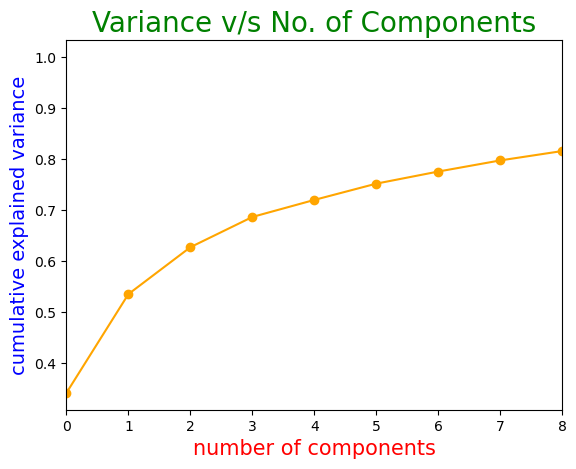

In [173]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [174]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [175]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

There are two main types of dimensionality reduction techniques: feature selection and feature extraction.

Feature selection is the process of selecting a subset of the most relevant features from the original feature set. It is a technique that helps to reduce the dimensionality of the data by removing irrelevant and redundant features. Common feature selection techniques include:

* Correlation-based feature selection
* Mutual information-based feature selection
* Recursive feature elimination
* SelectKBest

Feature extraction is the process of creating new features from the original feature set by combining or transforming the existing features. It is a technique that helps to reduce the dimensionality of the data by creating a new feature space that is more compact and informative than the original feature space. Common feature extraction techniques include:

* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Independent Component Analysis (ICA)
* Non-Negative Matrix Factorization (NMF)
* Autoencoder

Both feature selection and feature extraction can be used to reduce the dimensionality of the data and improve the performance of machine learning models. However, the choice of technique depends on the specific task, the data, and the computational resources available.

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

I have used PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.


When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.

### 8. Data Splitting

In [176]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [177]:
sentiment_df.shape

(9961, 6)

In [178]:
#spliting test train

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 17430)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17430)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why? 

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

## ***7. ML Model Implementation***

### ML Model - 1 Clustering   (K- Means)

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. 

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

In [179]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [180]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

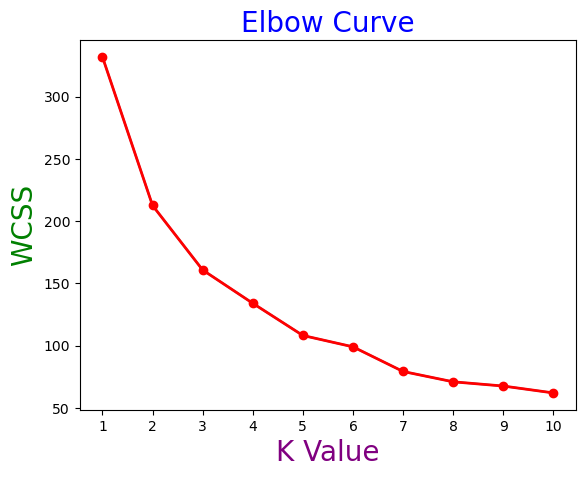

In [181]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

For n_clusters = 2 average silhouette_score is : 0.31354556014463375
For n_clusters = 3 average silhouette_score is : 0.27282461898125443
For n_clusters = 4 average silhouette_score is : 0.2542821791122474
For n_clusters = 5 average silhouette_score is : 0.25875250203574535
For n_clusters = 6 average silhouette_score is : 0.31332840035586496
For n_clusters = 7 average silhouette_score is : 0.2902607742369522
For n_clusters = 8 average silhouette_score is : 0.3117107285902248
For n_clusters = 9 average silhouette_score is : 0.30138820830478197


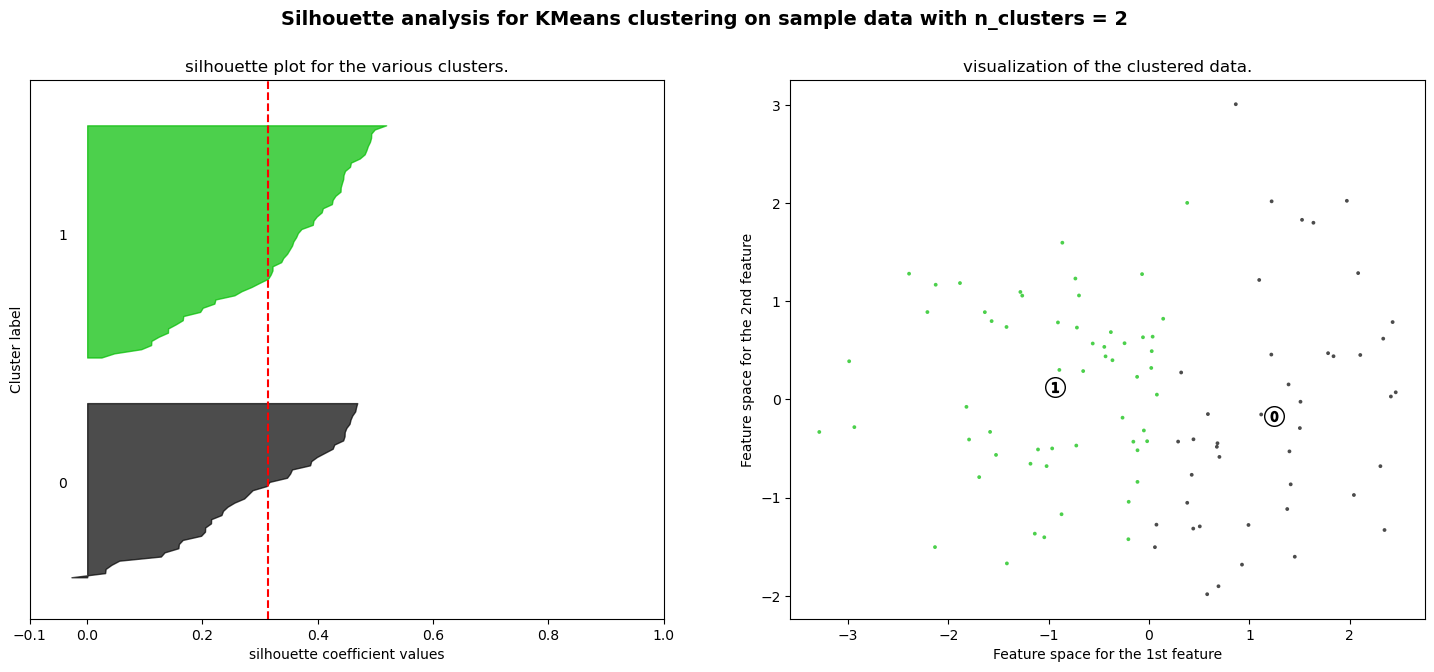

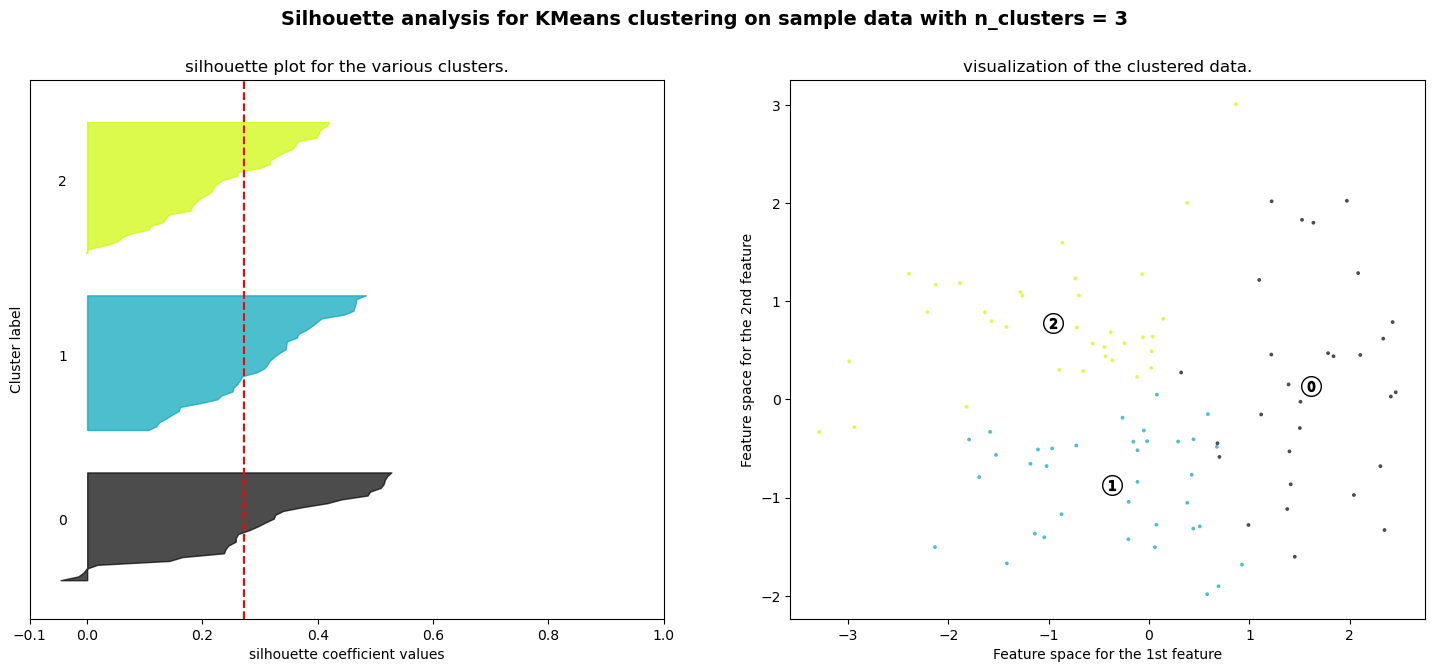

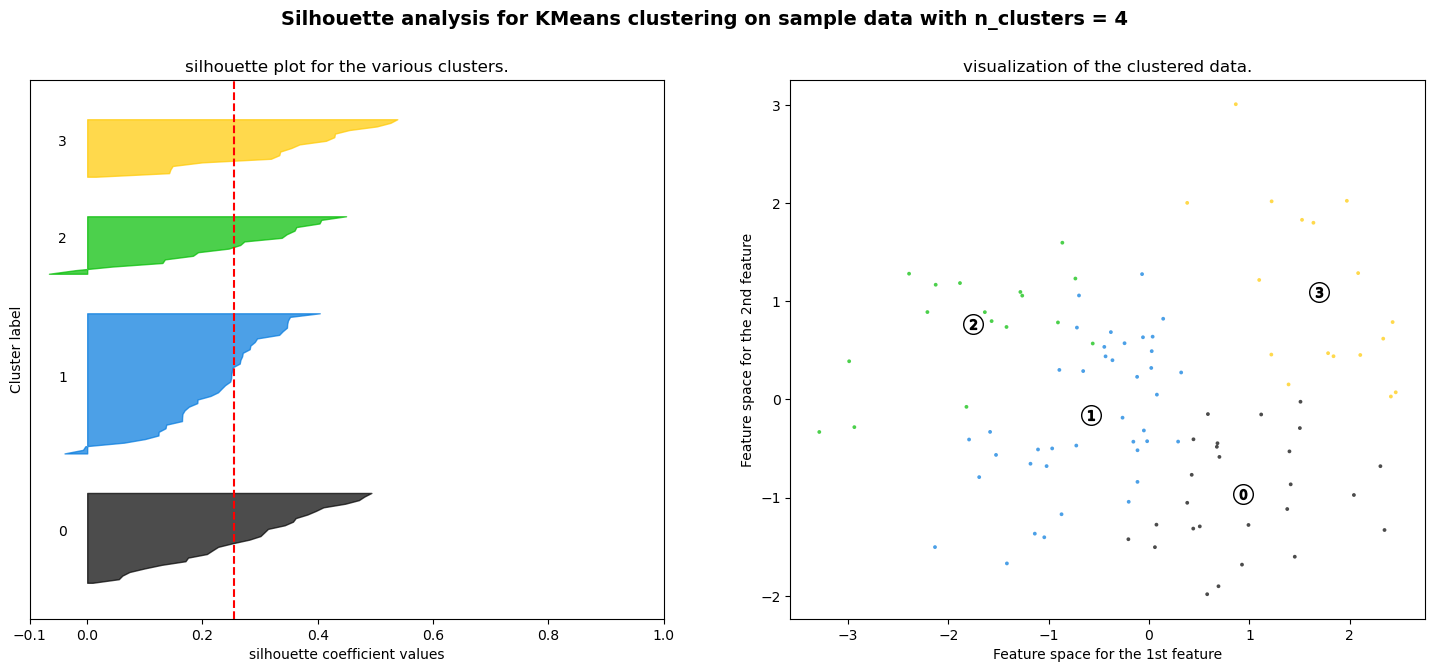

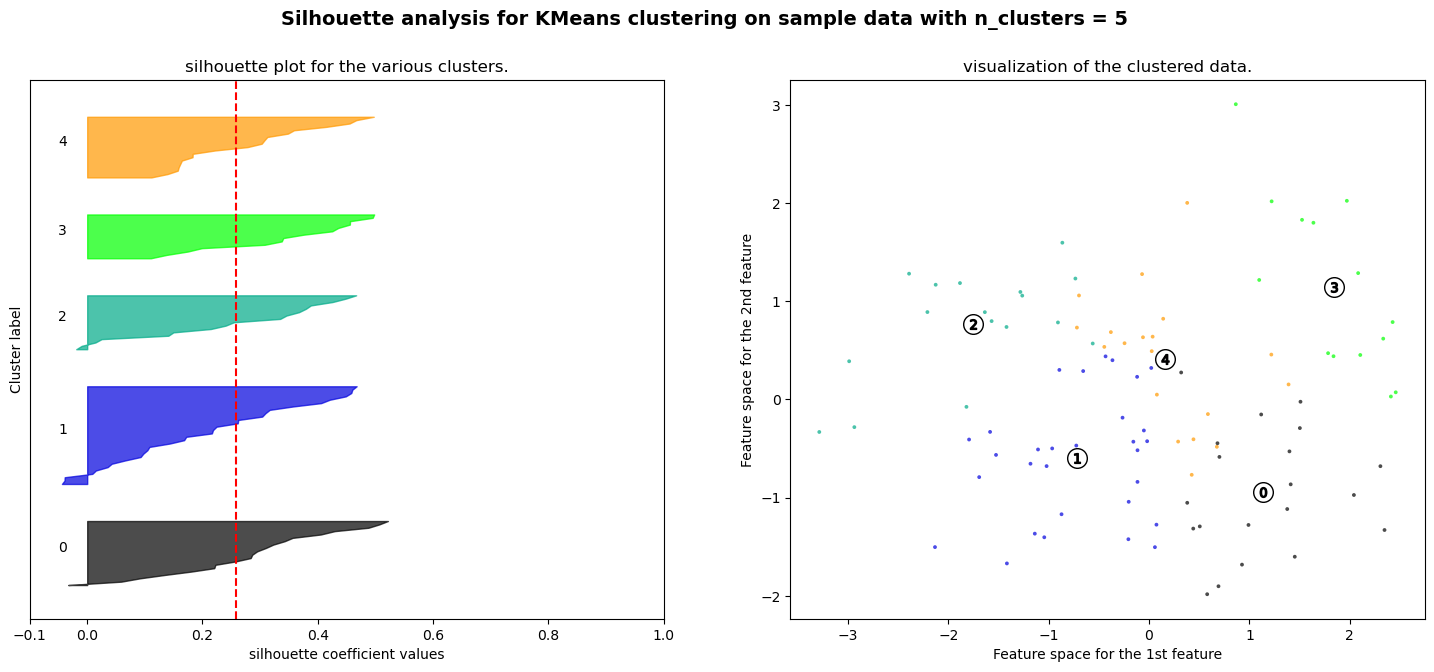

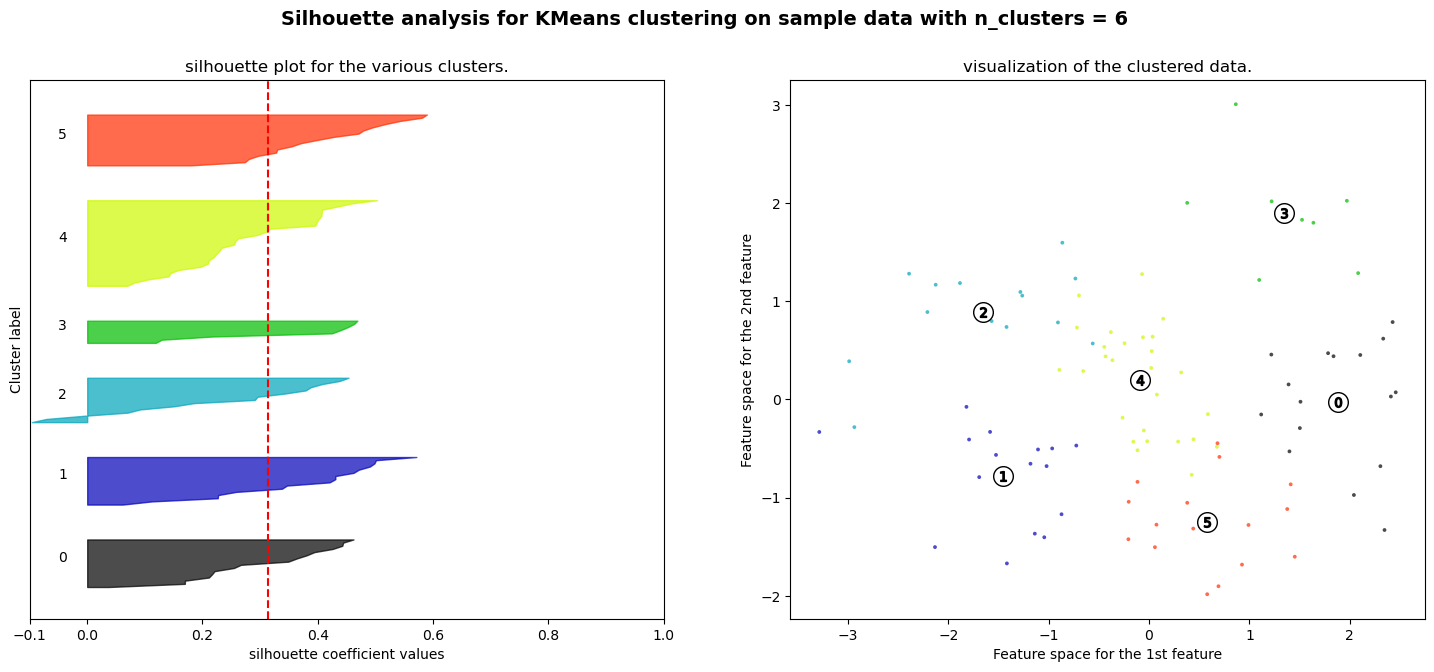

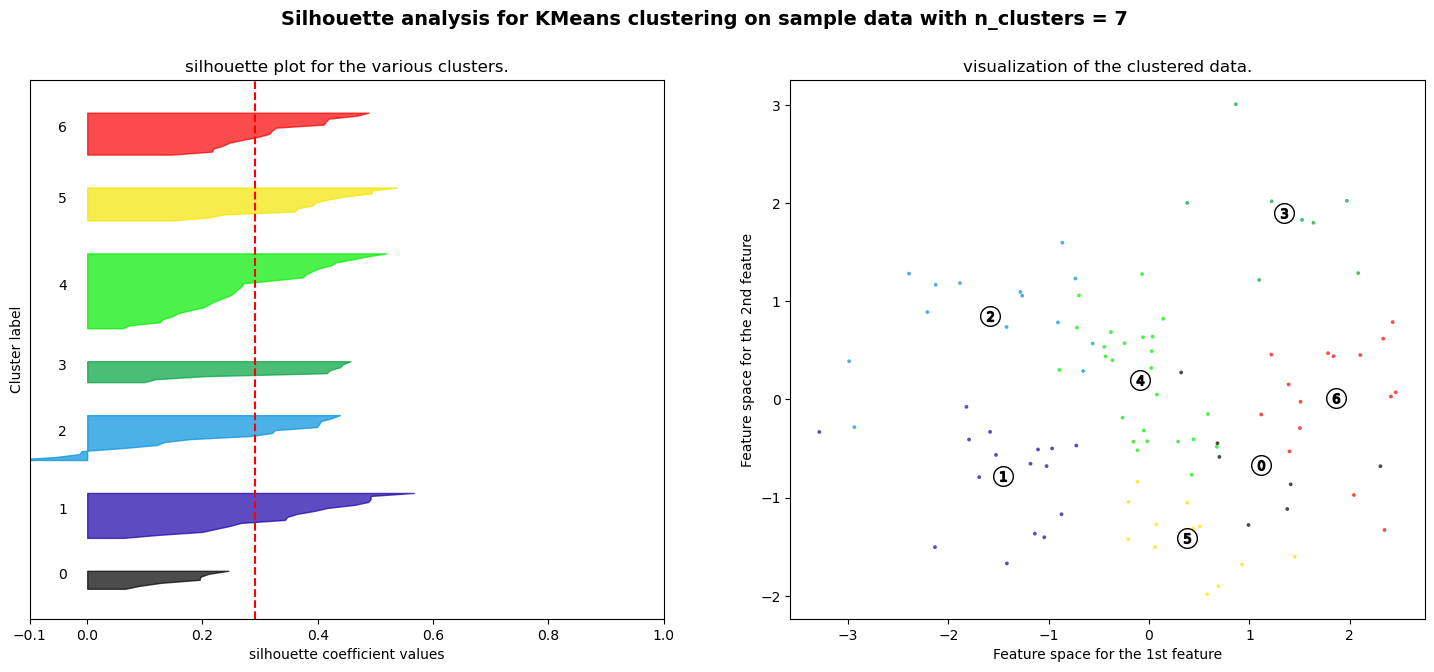

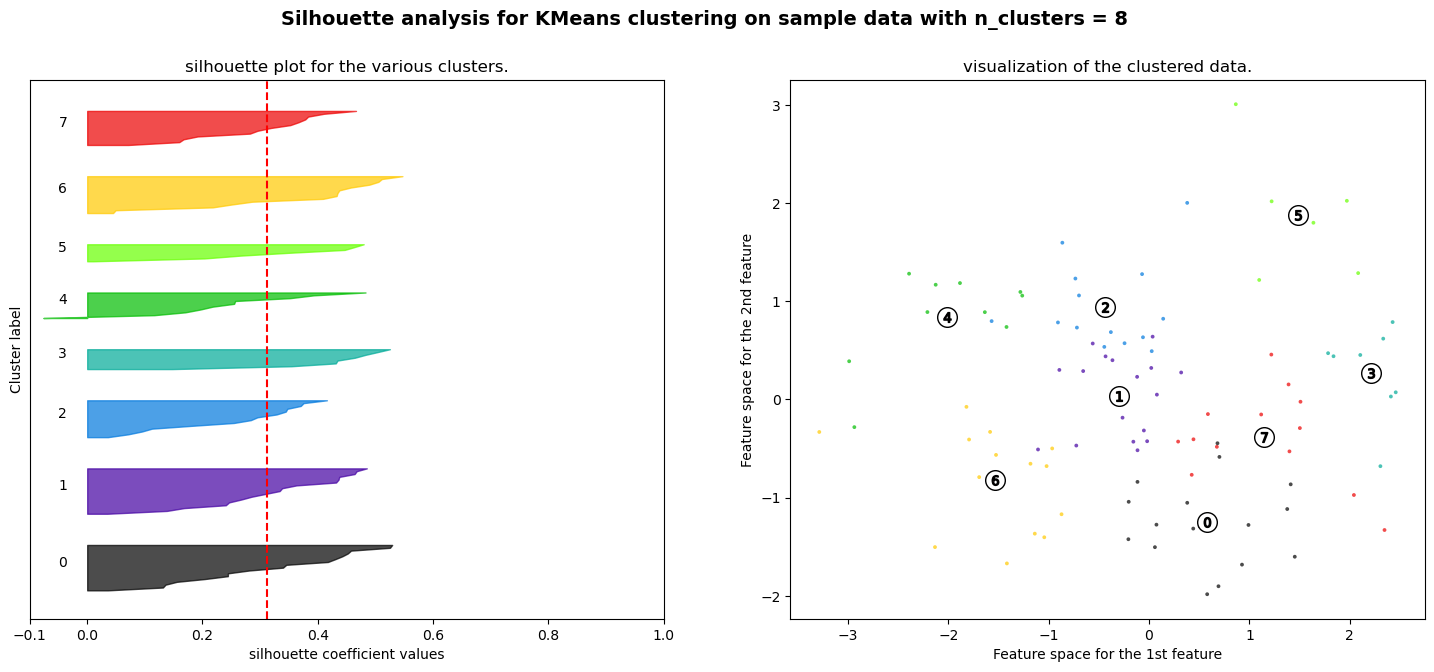

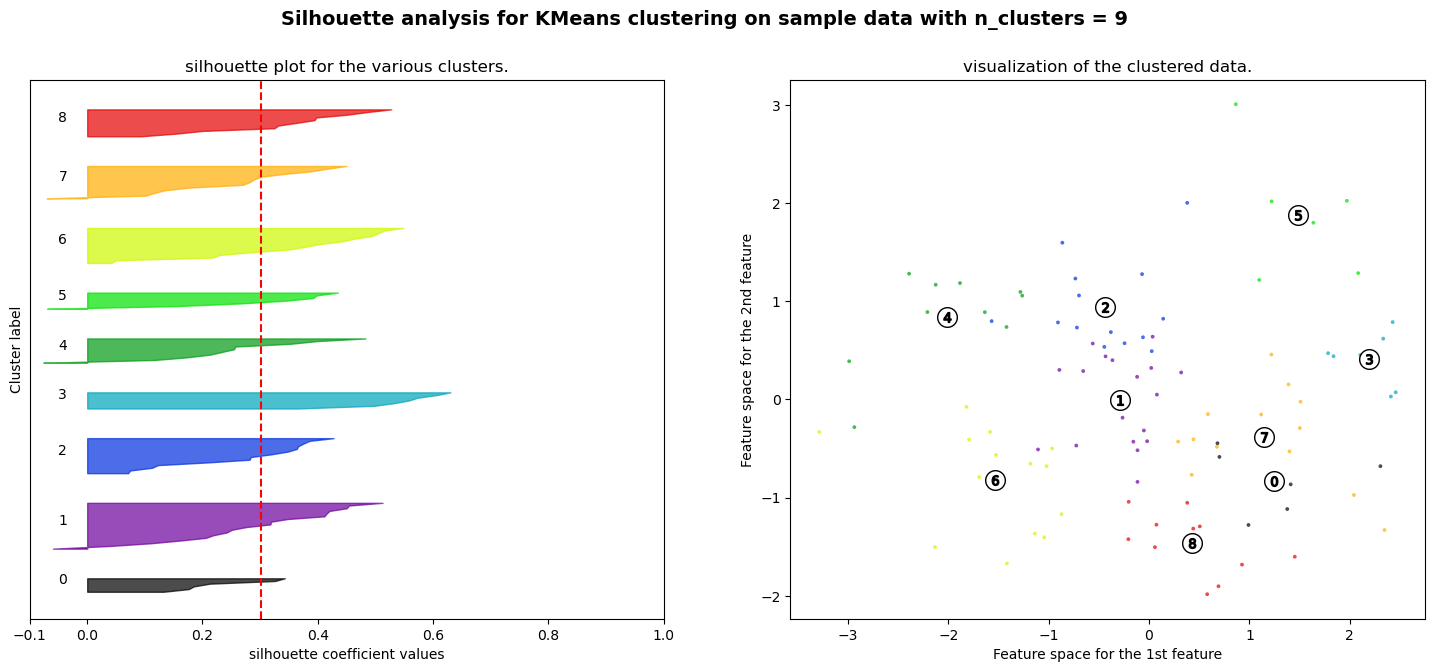

In [182]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters, "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data ""with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

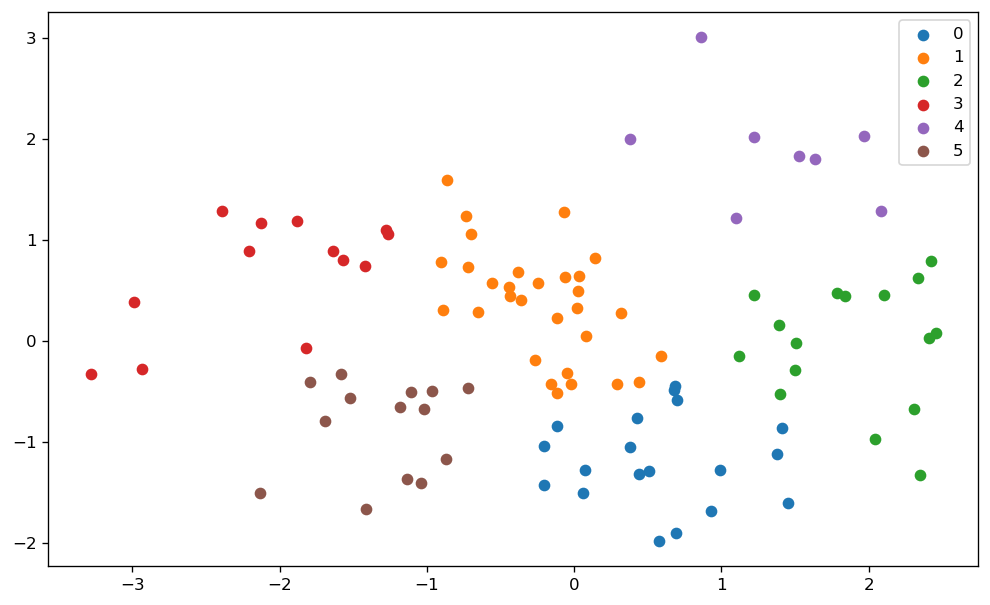

In [183]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [184]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(5)

PC1       PC2       PC3  label
Restaurant                                                                
Pista House                            0.925951 -1.683231 -0.158638      0
Tempteys                              -1.262946  1.056464 -0.822762      3
SKYHY                                  0.675531 -0.483204  1.090783      0
Shree Santosh Dhaba Family Restaurant -1.137904 -1.367746  0.215771      5
Gal Punjab Di                         -0.243976  0.571773  0.711222      1

In [185]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                     
Cream Stone  5.860786           3.845                    2         0       0   
Flechazo     7.170888           4.660                    4         0       0   

             Arabian  Asian  BBQ  Bakery  Beverages  ...  Pizza  Salad  \
Restaurant                                           ...                 
Cream Stone        0      0    0       0          0  ...      0      0   
Flechazo           0      1    0       0          0  ...      0      0   

             Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  \
Restaurant                                                                     
Cream Stone        0             0        0            0      0     0      0   
Flechazo           0             0        0            0      0     0      0   

             label  
Restaurant          
Cream Stone      3  
Flechazo         4  

[2 rows x 48 columns]

In [186]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

Cost  Average_Rating  Total_Cuisine_Count  American  \
Restaurant                                                                  
eat.fit              500.0        3.200000                    4         0   
American Wild Wings  600.0        3.974026                    4         1   

                     Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  \
Restaurant                                                           ...   
eat.fit                   0        0      0    0       0          0  ...   
American Wild Wings       0        0      0    0       0          0  ...   

                     Pizza  Salad  Seafood  South Indian  Spanish  \
Restaurant                                                          
eat.fit                  0      0        0             1        0   
American Wild Wings      0      1        0             0        0   

                     Street Food  Sushi  Thai  Wraps  label  
Restaurant                                                   
eat.fit                        0      0     0      0      0  
American Wild Wings            0      0     0      0      1  

[2 rows x 48 columns]

In [187]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotelCopy[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost','Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0            4.28   
1                     Biryani, North Indian, Chinese   800.0            4.70   
2       Asian, Mediterranean, North Indian, Desserts  1300.0            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0            3.21   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   

   Total_Cuisine_Count  label  
0                    6      2  
1                    3      4  
2                    4      4  
3                    5      0  
4                    5      2

In [188]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

Total_Restaurant  count
1                 0     19
0                 1     30
2                 2     16
4                 3     13
5                 4      8
3                 5     14

In [189]:
#creating new df for checking cuisine in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  \
43            The Foodie Monster Kitchen         Wraps   500.0   
13         The Lal Street - Bar Exchange       Italian  1300.0   
92  Collage - Hyatt Hyderabad Gachibowli       Italian  2250.0   
73                           Driven Cafe     Fast Food   600.0   
52                     Biryanis And More  North Indian   500.0   

    Average_Rating  Total_Cuisine_Count  label  
43           3.580                    3      1  
13           3.450                    3      1  
92           3.410                    5      2  
73           3.745                    3      1  
52           3.740                    3      1

In [190]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 2 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Seafood' 'Goan' 'BBQ' 'Japanese' 'Italian'
 'Salad' 'Sushi' 'Spanish' 'Modern Indian'] 

Cuisine List for Cluster : 4 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Mexican' 'Italian'
 'Salad' 'Bakery' 'Mughlai' 'Juices' 'Andhra' 'Hyderabadi' 'Finger Food'
 'Thai' 'Indonesian' 'Asian' 'Sushi' 'Momos' 'Desserts' 'Cafe' 'Burger'
 'Fast Food'] 

Cuisine List for Cluster : 3 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Pizza' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 5 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mugh

##### Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

- Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. 
- Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering** 
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

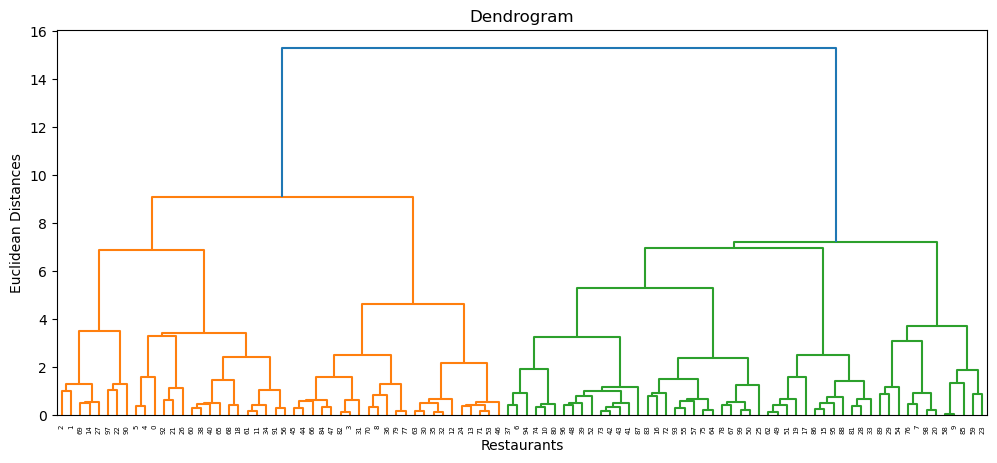

In [191]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [192]:
#Checking the Silhouette score for 10 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, metric = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29566419533238886
For n_clusters = 3, silhouette score is 0.22528398856680543
For n_clusters = 4, silhouette score is 0.20865729675680544
For n_clusters = 5, silhouette score is 0.24665245903028205
For n_clusters = 6, silhouette score is 0.27119012773344175
For n_clusters = 7, silhouette score is 0.268611089353792
For n_clusters = 8, silhouette score is 0.28150770224086585
For n_clusters = 9, silhouette score is 0.2880364278149132
For n_clusters = 10, silhouette score is 0.28854504323722213


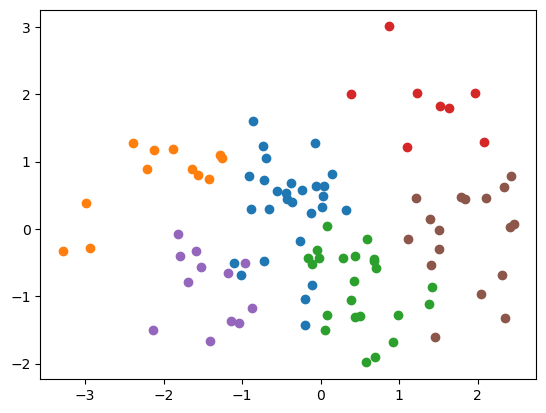

Silhouette Coefficient: 0.271
davies_bouldin_score 1.114


In [193]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 6)      #n_clusters=6
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [194]:
#creating new colummn for predicting cluster using hierarcial culstering
clustering_result['label_hr'] = y_hc
clustering_result.sample(5)

Restaurant  \
27       3B's - Buddies, Bar & Barbecue   
79                         Olive Garden   
49                        Mathura Vilas   
4            Over The Moon Brew Company   
36  Banana Leaf Multicuisine Restaurant   

                                             Cuisines    Cost  Average_Rating  \
27              North Indian, Mediterranean, European  1100.0            4.76   
79        North Indian, Chinese, Continental, Biryani   700.0            3.76   
49                South Indian, North Indian, Chinese   500.0            2.82   
4   Asian, Continental, North Indian, Chinese, Med...  1200.0            4.34   
36  Biryani, South Indian, North Indian, Chinese, ...   700.0            3.69   

    Total_Cuisine_Count  label  label_hr  
27                    3      4         3  
79                    4      0         2  
49                    3      5         4  
4                     5      2         5  
36                    5      0         2

⚡ **K-means** and **hierarchical clustering** are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand, is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**KMeans Clustering**
> I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

**Agglomerative Hierarchical Clustering**
> I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

#### 2. Cross- Validation & Hyperparameter Tuning


---

**Not required**

### ML Model - 2 Sentiment Analysis

#### unsupervised method

In [195]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))

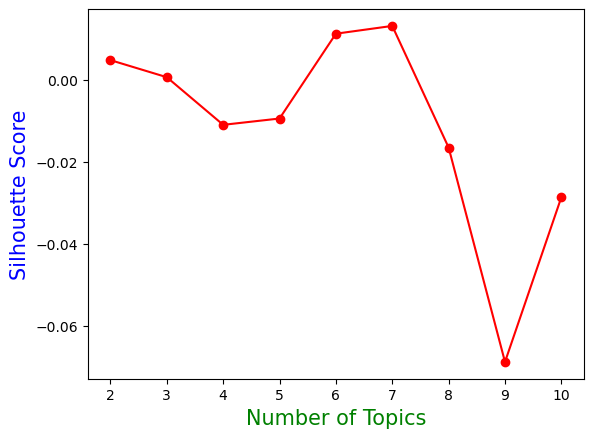

In [196]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [197]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [198]:
#creating copy to store predicted sentiments
review_sentiment_prediction = reviewCopy[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [199]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

Restaurant                    Reviewer  \
4665                  Ulavacharu   Yamini Chowdary Gudavalli   
200                     Flechazo               Vivek Vuppala   
9418              Dunkin' Donuts  Abhishek And Moumita Ghosh   
5734                Being Hungry              RAVIRAJ BHARTI   
4489  La La Land - Bar & Kitchen                     Swaroop   

                                                 Review  Rating  \
4665  This is my favorite restaurant always... But i...     4.0   
200   We were 4 people who visited this place on Thu...     2.0   
9418  Bit Costly..but taste wise its good...almost t...     4.0   
5734                                very less quantity.     2.0   
4489  The music is so loud. We have requested them m...     1.0   

                         Metadata                Time  Pictures  Prediction  
4665     7 Reviews , 12 Followers 2018-12-16 20:18:00         0           1  
200      2 Reviews , 40 Followers 2019-05-24 21:17:00         0           3  
9418  76 Reviews , 1411 Followers 2018-11-21 07:46:00         1           1  
5734                     1 Review 2018-09-07 22:18:00         0           1  
4489      4 Reviews , 3 Followers 2018-11-18 21:37:00         0           3

🗒argmax(axis=1) returns the index of the topic that has the highest probability for each sample, it finds the topic that has the highest probability of describing each sample in the dataset

TOP 100 WORDS FOR TOPIC #0


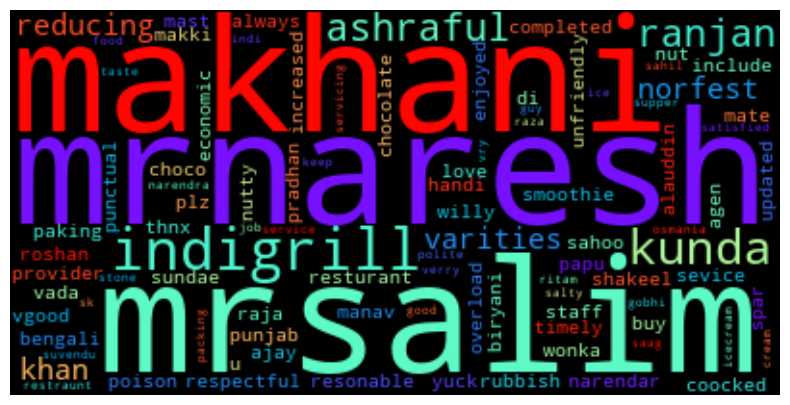

TOP 100 WORDS FOR TOPIC #1


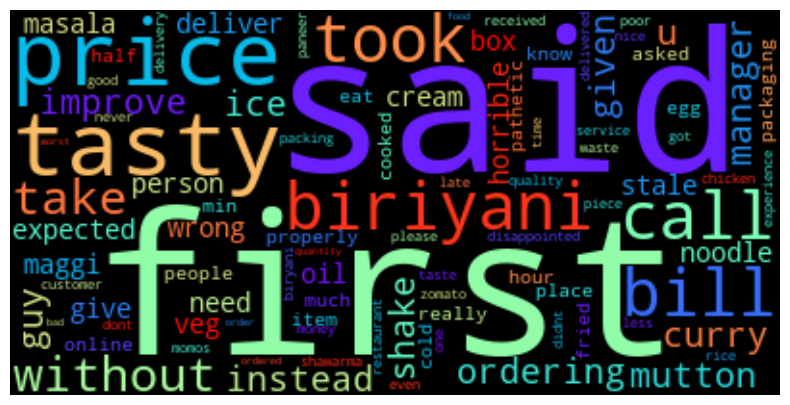

TOP 100 WORDS FOR TOPIC #2


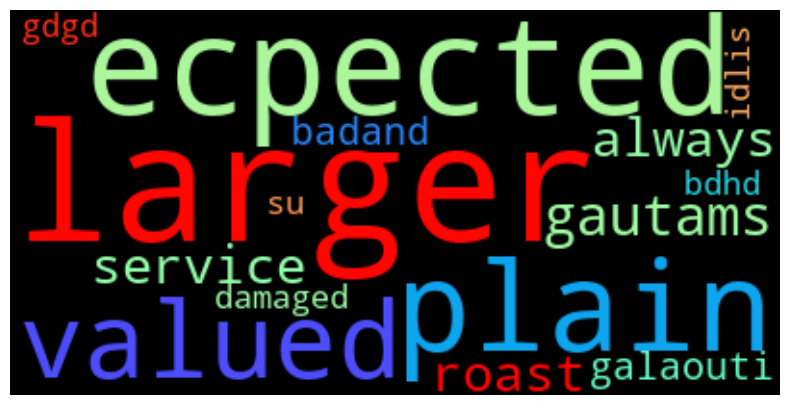

TOP 100 WORDS FOR TOPIC #3


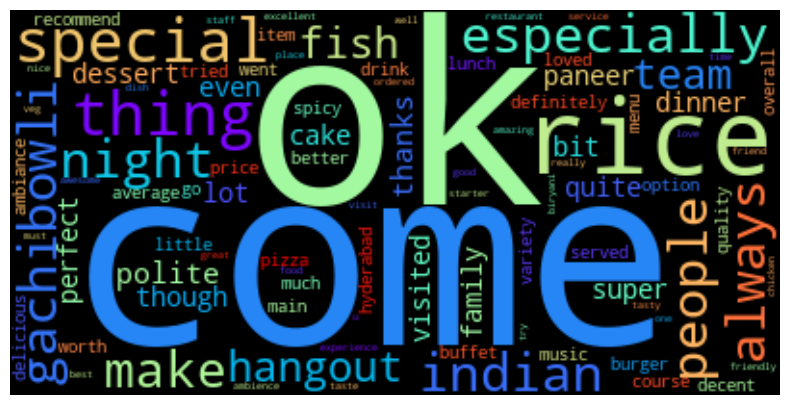

In [200]:
#wordcloud 
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

- **Topic 0:** Personalized Service Interactions and Experiences: This topic is centered on specific, personal interactions. It includes mentions of employee names, special occasions like a birthday, and words related to a customer's direct experience, both positive and negative.

- **Topic 1:** Holistic Dining Experience: This topic covers the complete customer journey. It includes words about the menu's variety (everything), the service (polite, team), and the social atmosphere (hangout, family).

- **Topic 2:** Positive Food Quality and Staff: This topic is dominated by strong positive sentiment (quality, excellent) and specific mentions of food items (sizzler) and staff names. This suggests that positive reviews are often tied to the perceived quality of the food and the personal service provided by employees.

- **Topic 3:** Specific Dishes and Opinions on Taste: This topic is highly focused on the actual food items themselves. It features words like paratha, roti, and biryani, along with taste-related adjectives, both good (tasty, yummy) and bad (tasteless, chilly).

In [201]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] == sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  3 

Rating
5.0    2928
4.0    2012
3.0     893
1.0     497
2.0     360
4.5      67
3.5      42
2.5      16
1.5       6
Name: count, dtype: int64
Prediction =  1 

Rating
1.0    1172
5.0     349
2.0     301
4.0     259
3.0     250
3.5       5
2.5       3
1.5       3
4.5       2
Name: count, dtype: int64
Prediction =  0 

Rating
5.0    387
4.0     86
1.0     41
3.0     28
2.0     12
Name: count, dtype: int64
Prediction =  2 

Rating
5.0    168
1.0     25
3.0     22
4.0     16
2.0     11
Name: count, dtype: int64


* LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

 So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.

#### Supervised Sentiment Analysis

* Combining supervised learning to know better about sentiments. 

In [202]:
#defining function to calculate score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

**Logistic Regression**

In [203]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

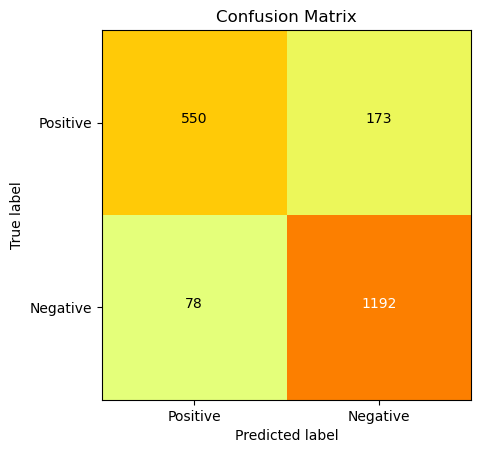

[[ 550  173]
 [  78 1192]]
Metric        Score
---------  --------
ROC AUC    0.849651
Precision  0.87326
Recall     0.938583
F1         0.904744
Accuracy   0.874059


In [204]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 569 instances are labeled as True Positive (correctly predicted as positive)
* 67 instances are labeled as False Positive (incorrectly predicted as positive)
* 1165 instances are labeled as True Negative (correctly predicted as negative)
* 192 instances are labeled as False Negative (incorrectly predicted as negative)

**XgBoost**

In [205]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

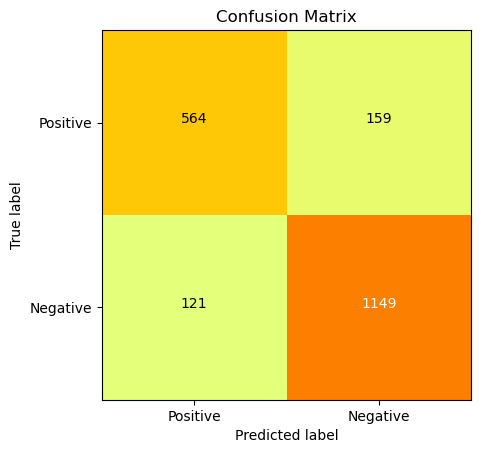

[[ 564  159]
 [ 121 1149]]
Metric        Score
---------  --------
ROC AUC    0.842404
Precision  0.87844
Recall     0.904724
F1         0.891389
Accuracy   0.859508


In [206]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the actual positive class (1) and the second row represents the actual negative class (0). The first column represents the predicted positive class (1) and the second column represents the predicted negative class (0).

* 582 instances are labeled as True Positive (correctly predicted as positive)
* 100 instances are labeled as False Positive (incorrectly predicted as positive)
* 1132 instances are labeled as True Negative (correctly predicted as negative)
* 179 instances are labeled as False Negative (incorrectly predicted as negative)

#### 2. Cross- Validation & Hyperparameter Tuning

**Logistic Regression**

In [207]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


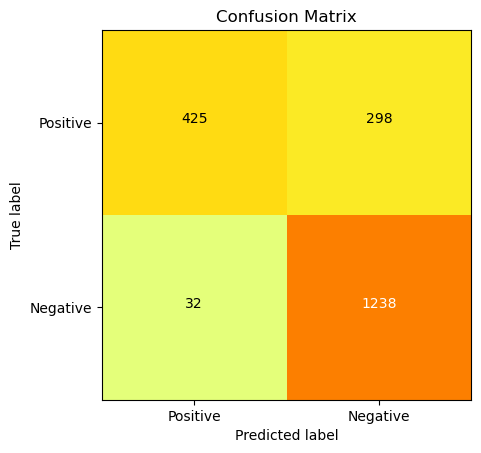

[[ 425  298]
 [  32 1238]]
Metric        Score
---------  --------
ROC AUC    0.781316
Precision  0.80599
Recall     0.974803
F1         0.882395
Accuracy   0.83442


In [208]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the actual positive class (1) and the second row represents the actual negative class (0). The first column represents the predicted positive class (1) and the second column represents the predicted negative class (0).

* 427 instances are labeled as True Positive (correctly predicted as positive)
* 26 instances are labeled as False Positive (incorrectly predicted as positive)
* 1206 instances are labeled as True Negative (correctly predicted as negative)
* 334 instances are labeled as False Negative (incorrectly predicted as negative)

**xgboost**

In [209]:
# finding the best parameters for XGBClassifier by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


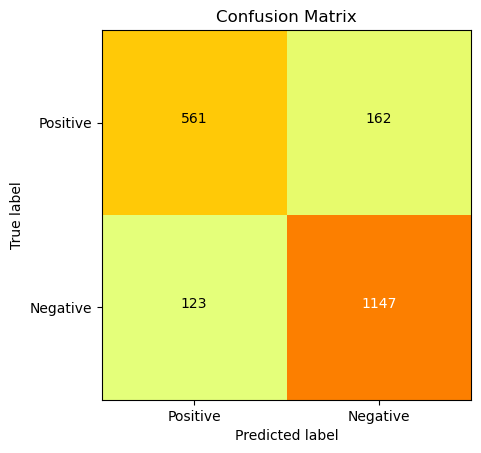

[[ 561  162]
 [ 123 1147]]
Metric        Score
---------  --------
ROC AUC    0.839542
Precision  0.876241
Recall     0.90315
F1         0.889492
Accuracy   0.856999


In [210]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the actual positive class (1) and the second row represents the actual negative class (0). The first column represents the predicted positive class (1) and the second column represents the predicted negative class (0).

* 587 instances are labeled as True Positive (correctly predicted as positive)
* 95 instances are labeled as False Positive (incorrectly predicted as positive)
* 1137 instances are labeled as True Negative (correctly predicted as negative)
* 174 instances are labeled as False Negative (incorrectly predicted as negative)

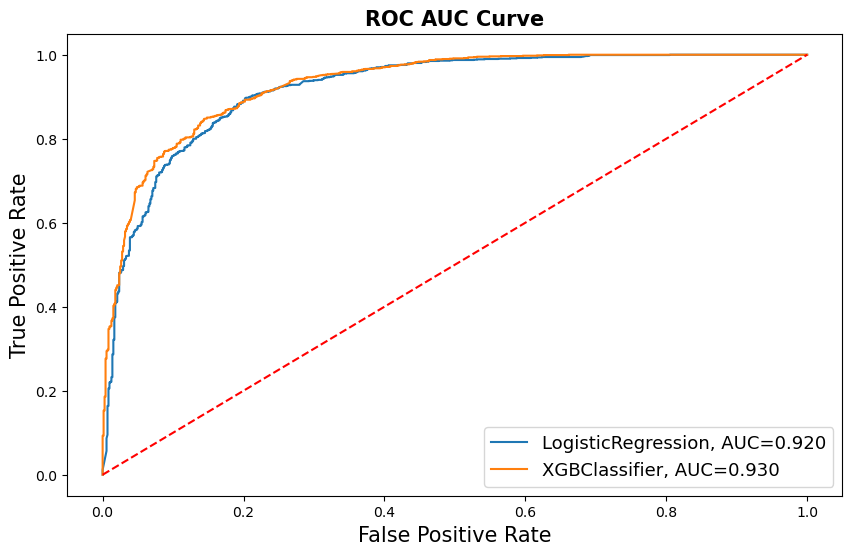

In [211]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),(xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    new_row = pd.DataFrame({'classifiers': [pair[0].__class__.__name__],
                        'fpr': [fpr],
                        'tpr': [tpr],
                        'auc': [auc]})

    result_table = pd.concat([result_table, new_row], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall for XgBoost Classifier there is a improvement i.e., it changes from

| Metric    | Before Tuning | After Tuning |
| --------- | ------------- | ------------ |
| ROC AUC   | 0.8418        | 0.8471       |
| Precision | 0.8635        | 0.8673       |
| Recall    | 0.9188        | 0.9229       |
| F1 Score  | 0.8903        | 0.8942       |
| Accuracy  | 0.8600        | 0.8650       |


* 587 instances are labeled as True Positive (correctly predicted as positive)
* 95 instances are labeled as False Positive (incorrectly predicted as positive)
* 1137 instances are labeled as True Negative (correctly predicted as negative)
* 174 instances are labeled as False Negative (incorrectly predicted as negative)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 Recommendation System

**Content-Based Filtering**

##### Recommendation based on user profile and restaurant genre

In [212]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost','Average_Rating','Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [213]:
#shape
restaurant_df.shape

(100, 45)

In [214]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [215]:
#matrix shape
rest_matrix.shape

(100, 44)

In [216]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer','Restaurant','Rating']].copy()
user_df.head()

Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours     5.0
1  Anusha Tirumalaneedi  Beyond Flavours     5.0
2       Ashok Shekhawat  Beyond Flavours     5.0
3        Swapnil Sarkar  Beyond Flavours     5.0
4                Dileep  Beyond Flavours     5.0

In [217]:
#shape
user_df.shape

(9961, 3)

In [218]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [219]:
#shape
user_rating.shape

(7446, 2)